# 1)	Importing necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore")

# 2)	Time series dataset retrieving and visualization

In [3]:
data = pd.read_csv('data/MER_T12_06.csv')
data.head()

MSN  YYYYMM   Value  Column_Order  \
0  CLEIEUS  197301  72.076             1   
1  CLEIEUS  197302  64.442             1   
2  CLEIEUS  197303  64.084             1   
3  CLEIEUS  197304  60.842             1   
4  CLEIEUS  197305  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
dataparse = lambda x : pd.to_datetime(x, format = '%Y%m', errors = 'coerce')
data = pd.read_csv('data/MER_T12_06.csv', parse_dates = ['YYYYMM'], date_parser = dataparse)
data.head()

MSN     YYYYMM   Value  Column_Order  \
0  CLEIEUS 1973-01-01  72.076             1   
1  CLEIEUS 1973-02-01  64.442             1   
2  CLEIEUS 1973-03-01  64.084             1   
3  CLEIEUS 1973-04-01  60.842             1   
4  CLEIEUS 1973-05-01  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [6]:
data.tail(15)

MSN     YYYYMM     Value  Column_Order  \
5079  TXEIEUS 2015-06-01   177.799             9   
5080  TXEIEUS 2015-07-01    201.06             9   
5081  TXEIEUS 2015-08-01   194.735             9   
5082  TXEIEUS 2015-09-01    170.79             9   
5083  TXEIEUS 2015-10-01   144.693             9   
5084  TXEIEUS 2015-11-01   133.131             9   
5085  TXEIEUS 2015-12-01   136.421             9   
5086  TXEIEUS        NaT  1918.544             9   
5087  TXEIEUS 2016-01-01    159.03             9   
5088  TXEIEUS 2016-02-01   133.106             9   
5089  TXEIEUS 2016-03-01   115.997             9   
5090  TXEIEUS 2016-04-01   113.815             9   
5091  TXEIEUS 2016-05-01    129.44             9   
5092  TXEIEUS 2016-06-01   172.074             9   
5093  TXEIEUS 2016-07-01   201.958             9   

                                           Description  \
5079  Total Energy Electric Power Sector CO2 Emissions   
5080  Total Energy Electric Power Sector CO2 Emissions   
5081  Total Energy Electric Power Sector CO2 Emissions   
5082  Total Energy Electric Power Sector CO2 Emissions   
5083  Total Energy Electric Power Sector CO2 Emissions   
5084  Total Energy Electric Power Sector CO2 Emissions   
5085  Total Energy Electric Power Sector CO2 Emissions   
5086  Total Energy Electric Power Sector CO2 Emissions   
5087  Total Energy Electric Power Sector CO2 Emissions   
5088  Total Energy Electric Power Sector CO2 Emissions   
5089  Total Energy Electric Power Sector CO2 Emissions   
5090  Total Energy Electric Power Sector CO2 Emissions   
5091  Total Energy Electric Power Sector CO2 Emissions   
5092  Total Energy Electric Power Sector CO2 Emissions   
5093  Total Energy Electric Power Sector CO2 Emissions   

                                       Unit  
5079  Million Metric Tons of Carbon Dioxide  
5080  Million Metric Tons of Carbon Dioxide  
5081  Million Metric Tons of Carbon Dioxide  
5082  Million Metric Tons of Carbon Dioxide  
5083  Million Metric Tons of Carbon Dioxide  
5084  Million Metric Tons of Carbon Dioxide  
5085  Million Metric Tons of Carbon Dioxide  
5086  Million Metric Tons of Carbon Dioxide  
5087  Million Metric Tons of Carbon Dioxide  
5088  Million Metric Tons of Carbon Dioxide  
5089  Million Metric Tons of Carbon Dioxide  
5090  Million Metric Tons of Carbon Dioxide  
5091  Million Metric Tons of Carbon Dioxide  
5092  Million Metric Tons of Carbon Dioxide  
5093  Million Metric Tons of Carbon Dioxide

In [7]:
data.Column_Order.value_counts()

Column_Order
1    566
2    566
3    566
4    566
5    566
6    566
7    566
8    566
9    566
Name: count, dtype: int64

In [8]:
data.Unit.value_counts()

Unit
Million Metric Tons of Carbon Dioxide    5094
Name: count, dtype: int64

In [9]:
data.Description.value_counts() # 9values

Description
Coal Electric Power Sector CO2 Emissions                                                      566
Natural Gas Electric Power Sector CO2 Emissions                                               566
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions    566
Petroleum Coke Electric Power Sector CO2 Emissions                                            566
Residual Fuel Oil Electric Power Sector CO2 Emissions                                         566
Petroleum Electric Power Sector CO2 Emissions                                                 566
Geothermal Energy Electric Power Sector CO2 Emissions                                         566
Non-Biomass Waste Electric Power Sector CO2 Emissions                                         566
Total Energy Electric Power Sector CO2 Emissions                                              566
Name: count, dtype: int64

In [10]:
data.MSN.value_counts()

MSN
CLEIEUS    566
NNEIEUS    566
DKEIEUS    566
PCEIEUS    566
RFEIEUS    566
PAEIEUS    566
GEEIEUS    566
NWEIEUS    566
TXEIEUS    566
Name: count, dtype: int64

In [11]:
ts = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values]
ts.head(15)

MSN     YYYYMM    Value  Column_Order  \
0   CLEIEUS 1973-01-01   72.076             1   
1   CLEIEUS 1973-02-01   64.442             1   
2   CLEIEUS 1973-03-01   64.084             1   
3   CLEIEUS 1973-04-01   60.842             1   
4   CLEIEUS 1973-05-01   61.798             1   
5   CLEIEUS 1973-06-01   66.538             1   
6   CLEIEUS 1973-07-01   72.626             1   
7   CLEIEUS 1973-08-01   75.181             1   
8   CLEIEUS 1973-09-01   68.397             1   
9   CLEIEUS 1973-10-01   67.668             1   
10  CLEIEUS 1973-11-01   67.021             1   
11  CLEIEUS 1973-12-01   71.118             1   
12  CLEIEUS        NaT  811.791             1   
13  CLEIEUS 1974-01-01    70.55             1   
14  CLEIEUS 1974-02-01   62.929             1   

                                 Description  \
0   Coal Electric Power Sector CO2 Emissions   
1   Coal Electric Power Sector CO2 Emissions   
2   Coal Electric Power Sector CO2 Emissions   
3   Coal Electric Power Sector CO2 Emissions   
4   Coal Electric Power Sector CO2 Emissions   
5   Coal Electric Power Sector CO2 Emissions   
6   Coal Electric Power Sector CO2 Emissions   
7   Coal Electric Power Sector CO2 Emissions   
8   Coal Electric Power Sector CO2 Emissions   
9   Coal Electric Power Sector CO2 Emissions   
10  Coal Electric Power Sector CO2 Emissions   
11  Coal Electric Power Sector CO2 Emissions   
12  Coal Electric Power Sector CO2 Emissions   
13  Coal Electric Power Sector CO2 Emissions   
14  Coal Electric Power Sector CO2 Emissions   

                                     Unit  
0   Million Metric Tons of Carbon Dioxide  
1   Million Metric Tons of Carbon Dioxide  
2   Million Metric Tons of Carbon Dioxide  
3   Million Metric Tons of Carbon Dioxide  
4   Million Metric Tons of Carbon Dioxide  
5   Million Metric Tons of Carbon Dioxide  
6   Million Metric Tons of Carbon Dioxide  
7   Million Metric Tons of Carbon Dioxide  
8   Million Metric Tons of Carbon Dioxide  
9   Million Metric Tons of Carbon Dioxide  
10  Million Metric Tons of Carbon Dioxide  
11  Million Metric Tons of Carbon Dioxide  
12  Million Metric Tons of Carbon Dioxide  
13  Million Metric Tons of Carbon Dioxide  
14  Million Metric Tons of Carbon Dioxide

In [12]:
ts.dtypes

MSN                     object
YYYYMM          datetime64[ns]
Value                   object
Column_Order             int64
Description             object
Unit                    object
dtype: object

In [13]:
ts['Value'] = pd.to_numeric(ts['Value'], errors = 'coerce')
ts.head()

MSN     YYYYMM   Value  Column_Order  \
0  CLEIEUS 1973-01-01  72.076             1   
1  CLEIEUS 1973-02-01  64.442             1   
2  CLEIEUS 1973-03-01  64.084             1   
3  CLEIEUS 1973-04-01  60.842             1   
4  CLEIEUS 1973-05-01  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [14]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           5094 non-null   object        
 1   YYYYMM        4707 non-null   datetime64[ns]
 2   Value         4678 non-null   float64       
 3   Column_Order  5094 non-null   int64         
 4   Description   5094 non-null   object        
 5   Unit          5094 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 238.9+ KB


In [15]:
ts.dtypes

MSN                     object
YYYYMM          datetime64[ns]
Value                  float64
Column_Order             int64
Description             object
Unit                    object
dtype: object

In [16]:
ts.dropna(inplace = True)

## 4.2	Time series dataset visualization

The dataset has 8 energy sources of CO2 emission. In the following cell, we will group the CO2 Emission dataset based on the type of energy source.

In [17]:
Energy_sources = ts.groupby('Description')
Energy_sources.head()

MSN     YYYYMM    Value  Column_Order  \
0     CLEIEUS 1973-01-01   72.076             1   
1     CLEIEUS 1973-02-01   64.442             1   
2     CLEIEUS 1973-03-01   64.084             1   
3     CLEIEUS 1973-04-01   60.842             1   
4     CLEIEUS 1973-05-01   61.798             1   
566   NNEIEUS 1973-01-01   12.175             2   
567   NNEIEUS 1973-02-01   11.708             2   
568   NNEIEUS 1973-03-01   13.994             2   
569   NNEIEUS 1973-04-01   14.627             2   
570   NNEIEUS 1973-05-01   17.344             2   
1132  DKEIEUS 1973-01-01    2.375             3   
1133  DKEIEUS 1973-02-01    2.061             3   
1134  DKEIEUS 1973-03-01    1.171             3   
1135  DKEIEUS 1973-04-01    1.022             3   
1136  DKEIEUS 1973-05-01    0.949             3   
1698  PCEIEUS 1973-01-01    0.128             4   
1699  PCEIEUS 1973-02-01    0.106             4   
1700  PCEIEUS 1973-03-01    0.083             4   
1701  PCEIEUS 1973-04-01    0.130             4   
1702  PCEIEUS 1973-05-01    0.167             4   
2264  RFEIEUS 1973-01-01   24.867             5   
2265  RFEIEUS 1973-02-01   20.867             5   
2266  RFEIEUS 1973-03-01   19.780             5   
2267  RFEIEUS 1973-04-01   16.562             5   
2268  RFEIEUS 1973-05-01   17.754             5   
2830  PAEIEUS 1973-01-01   27.369             6   
2831  PAEIEUS 1973-02-01   23.034             6   
2832  PAEIEUS 1973-03-01   21.034             6   
2833  PAEIEUS 1973-04-01   17.714             6   
2834  PAEIEUS 1973-05-01   18.870             6   
3604  GEEIEUS 1989-01-01    0.031             7   
3605  GEEIEUS 1989-02-01    0.028             7   
3606  GEEIEUS 1989-03-01    0.031             7   
3607  GEEIEUS 1989-04-01    0.030             7   
3608  GEEIEUS 1989-05-01    0.031             7   
4170  NWEIEUS 1989-01-01    0.371             8   
4171  NWEIEUS 1989-02-01    0.335             8   
4172  NWEIEUS 1989-03-01    0.371             8   
4173  NWEIEUS 1989-04-01    0.359             8   
4174  NWEIEUS 1989-05-01    0.371             8   
4528  TXEIEUS 1973-01-01  111.621             9   
4529  TXEIEUS 1973-02-01   99.185             9   
4530  TXEIEUS 1973-03-01   99.112             9   
4531  TXEIEUS 1973-04-01   93.183             9   
4532  TXEIEUS 1973-05-01   98.012             9   

                                            Description  \
0              Coal Electric Power Sector CO2 Emissions   
1              Coal Electric Power Sector CO2 Emissions   
2              Coal Electric Power Sector CO2 Emissions   
3              Coal Electric Power Sector CO2 Emissions   
4              Coal Electric Power Sector CO2 Emissions   
566     Natural Gas Electric Power Sector CO2 Emissions   
567     Natural Gas Electric Power Sector CO2 Emissions   
568     Natural Gas Electric Power Sector CO2 Emissions   
569     Natural Gas Electric Power Sector CO2 Emissions   
570     Natural Gas Electric Power Sector CO2 Emissions   
1132  Distillate Fuel, Including Kerosene-Type Jet F...   
1133  Distillate Fuel, Including Kerosene-Type Jet F...   
1134  Distillate Fuel, Including Kerosene-Type Jet F...   
1135  Distillate Fuel, Including Kerosene-Type Jet F...   
1136  Distillate Fuel, Including Kerosene-Type Jet F...   
1698  Petroleum Coke Electric Power Sector CO2 Emiss...   
1699  Petroleum Coke Electric Power Sector CO2 Emiss...   
1700  Petroleum Coke Electric Power Sector CO2 Emiss...   
1701  Petroleum Coke Electric Power Sector CO2 Emiss...   
1702  Petroleum Coke Electric Power Sector CO2 Emiss...   
2264  Residual Fuel Oil Electric Power Sector CO2 Em...   
2265  Residual Fuel Oil Electric Power Sector CO2 Em...   
2266  Residual Fuel Oil Electric Power Sector CO2 Em...   
2267  Residual Fuel Oil Electric Power Sector CO2 Em...   
2268  Residual Fuel Oil Electric Power Sector CO2 Em...   
2830      Petroleum Electric Power Sector CO2 Emissions   
2831      Petroleum Electric Power Sector CO2 Emissions   
2832      P

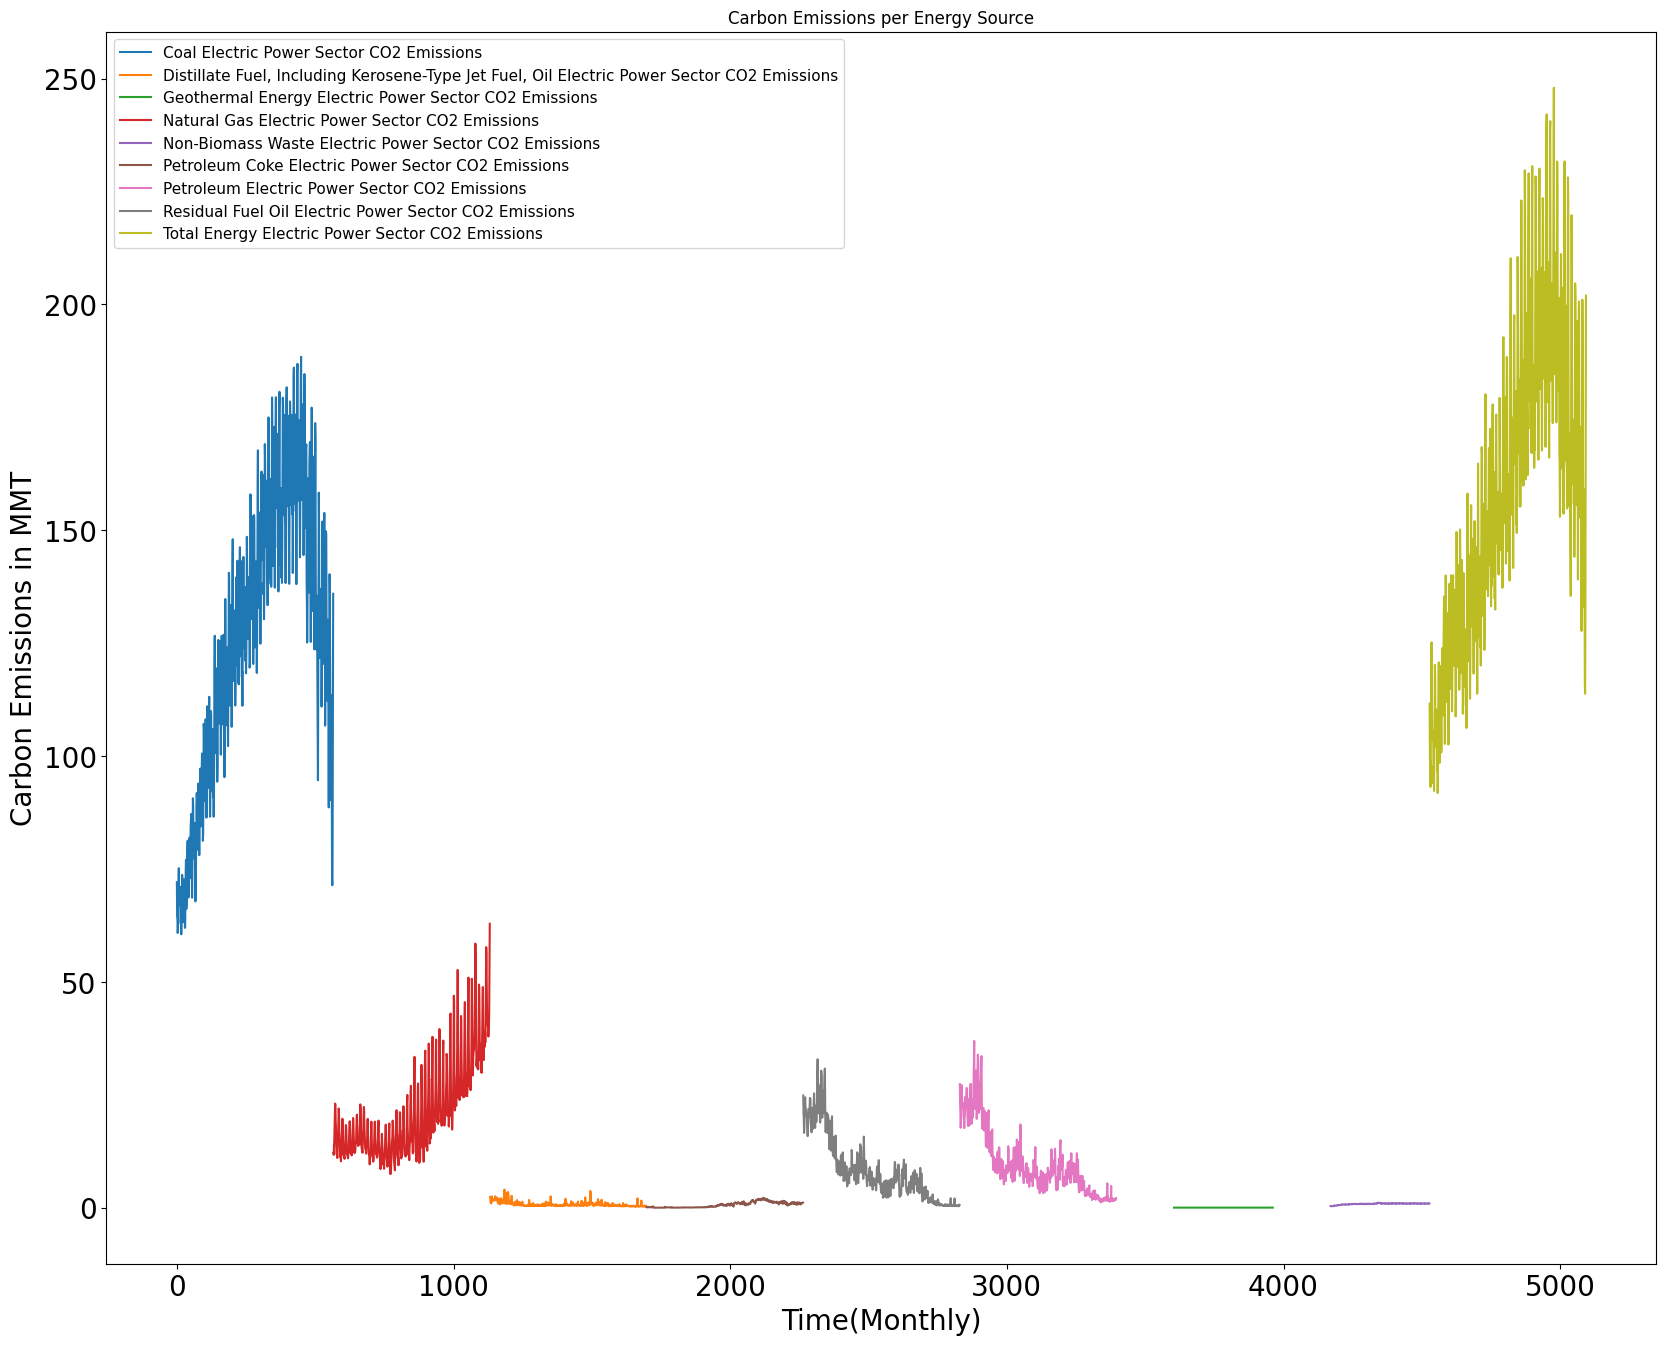

In [18]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 11)

plt.show()

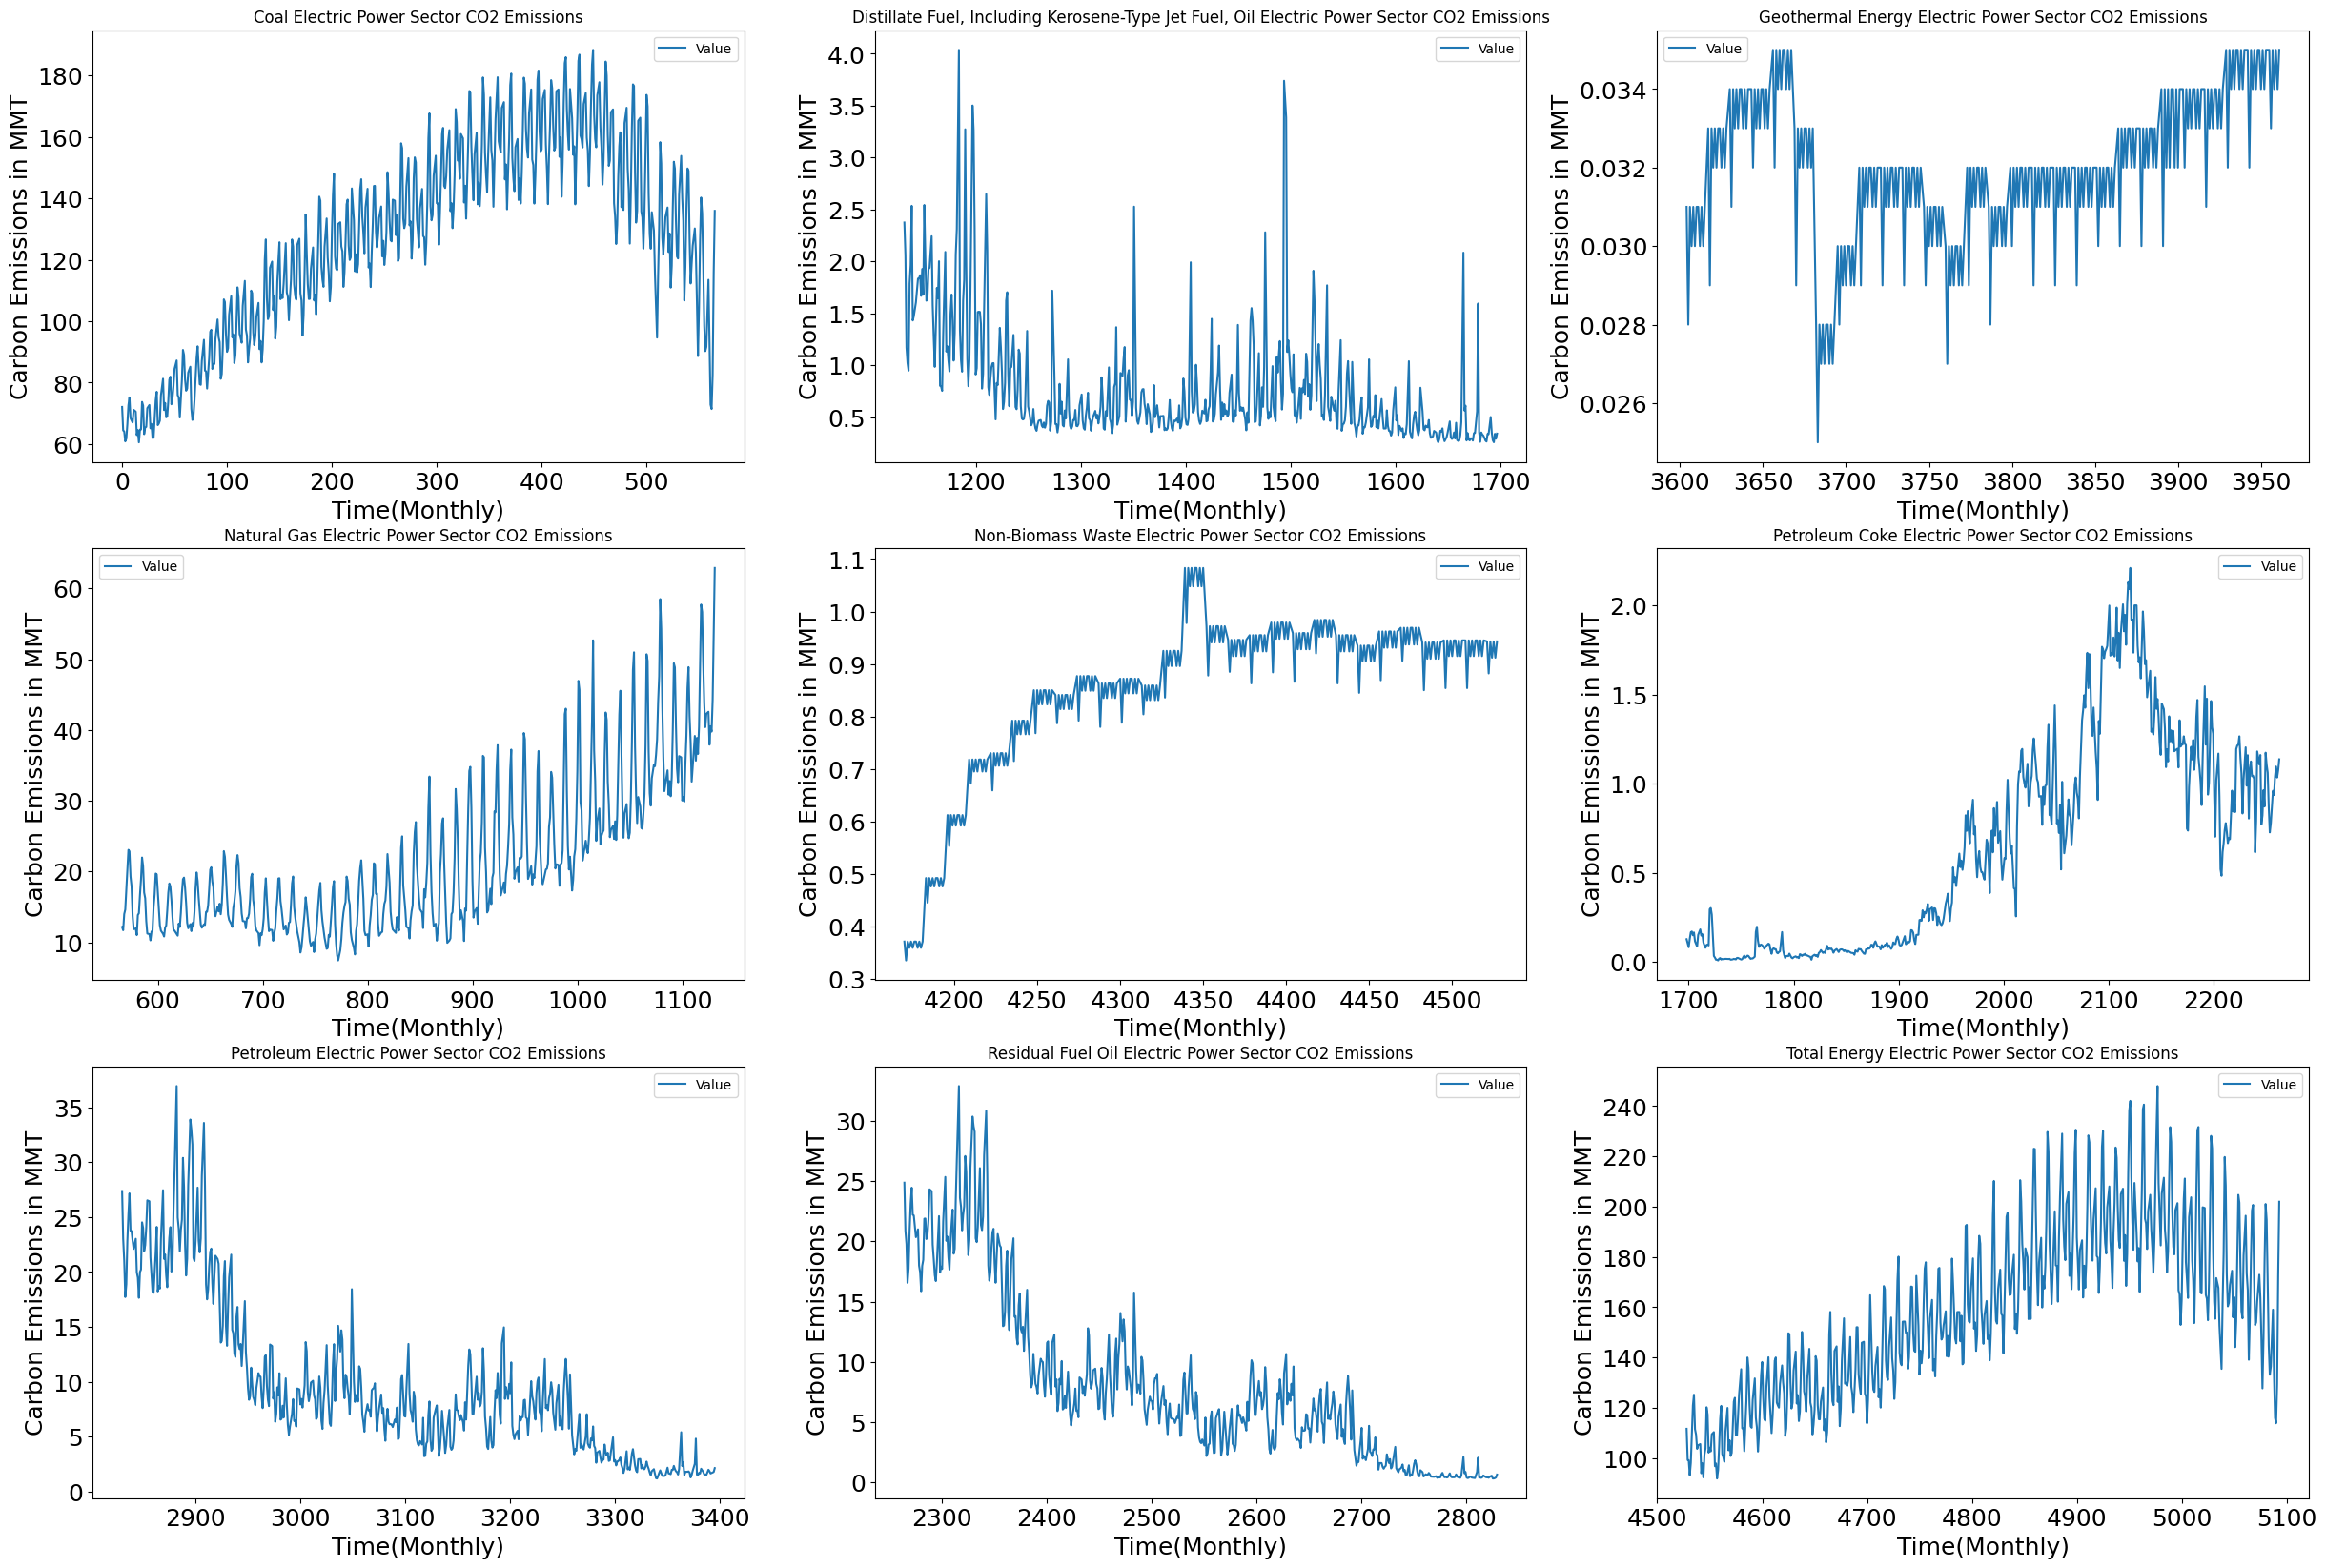

In [19]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

## 2.3	Bar chart of CO2 Emissions per energy source

In [20]:
CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()

In [21]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [22]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

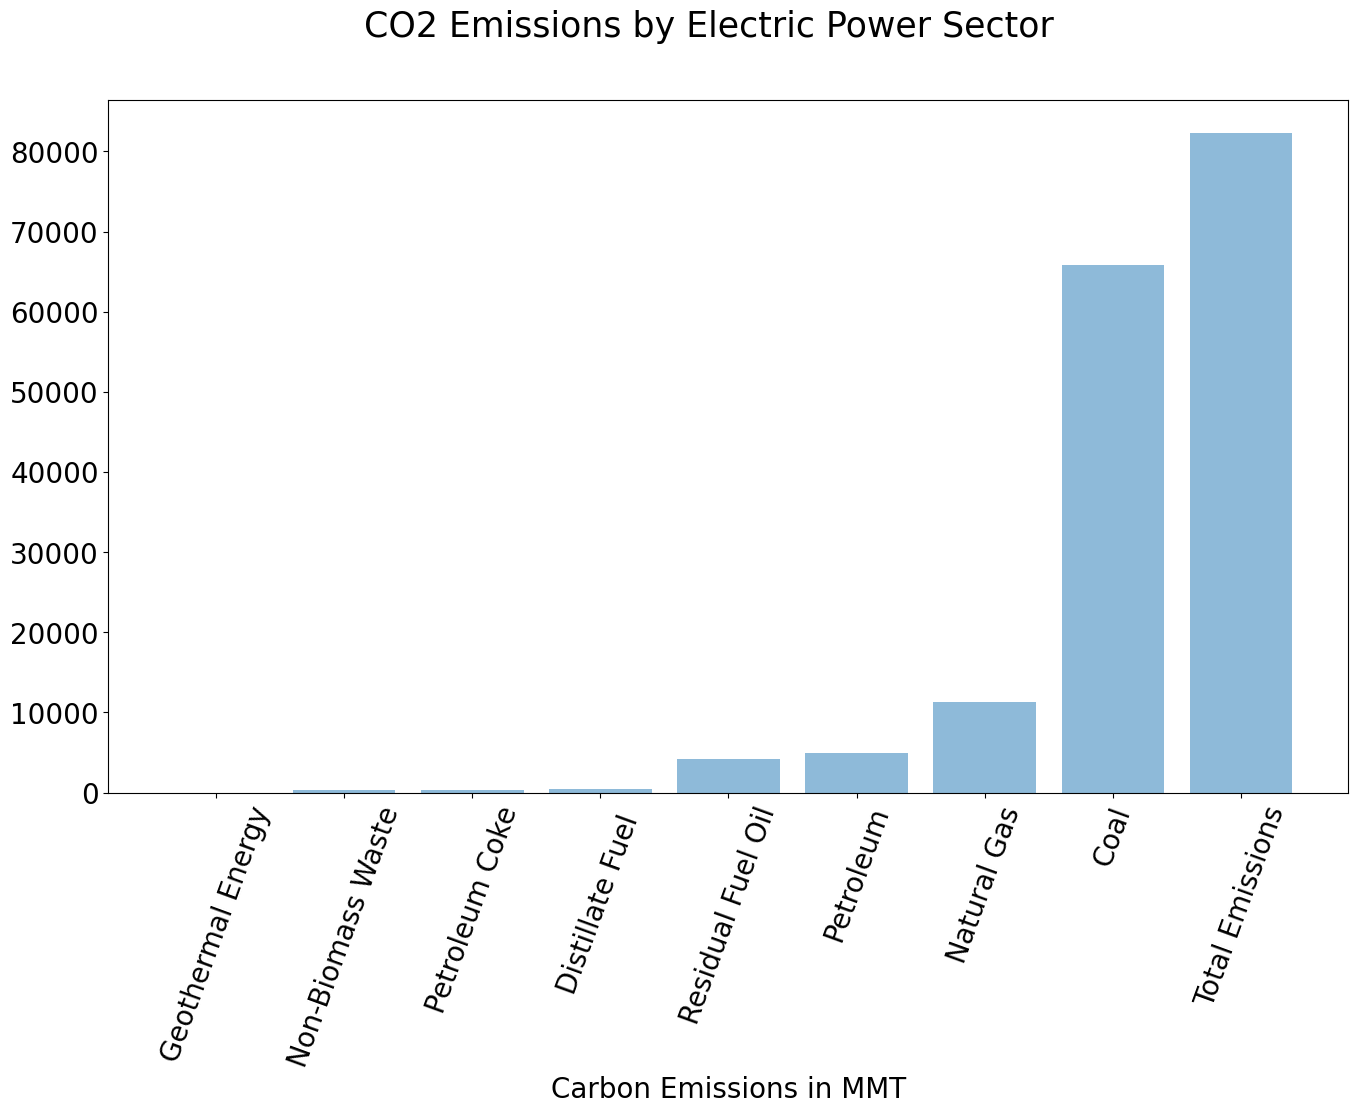

In [23]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

# 3) Natural gas CO2 emission analysis

In [24]:
ts.head()

MSN     YYYYMM   Value  Column_Order  \
0  CLEIEUS 1973-01-01  72.076             1   
1  CLEIEUS 1973-02-01  64.442             1   
2  CLEIEUS 1973-03-01  64.084             1   
3  CLEIEUS 1973-04-01  60.842             1   
4  CLEIEUS 1973-05-01  61.798             1   

                                Description  \
0  Coal Electric Power Sector CO2 Emissions   
1  Coal Electric Power Sector CO2 Emissions   
2  Coal Electric Power Sector CO2 Emissions   
3  Coal Electric Power Sector CO2 Emissions   
4  Coal Electric Power Sector CO2 Emissions   

                                    Unit  
0  Million Metric Tons of Carbon Dioxide  
1  Million Metric Tons of Carbon Dioxide  
2  Million Metric Tons of Carbon Dioxide  
3  Million Metric Tons of Carbon Dioxide  
4  Million Metric Tons of Carbon Dioxide

In [25]:
ts.set_index('YYYYMM', inplace=True)

# Group by 'Description' and monthly frequency
Emissions = ts.iloc[:, 1:]
Emissions = Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level=0)

# Extract monthly total emissions for Natural Gas
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions']
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [26]:
mte.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

## 3.1 Test Stationary

In [27]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

## 3.1.1 Graphycally test stationary

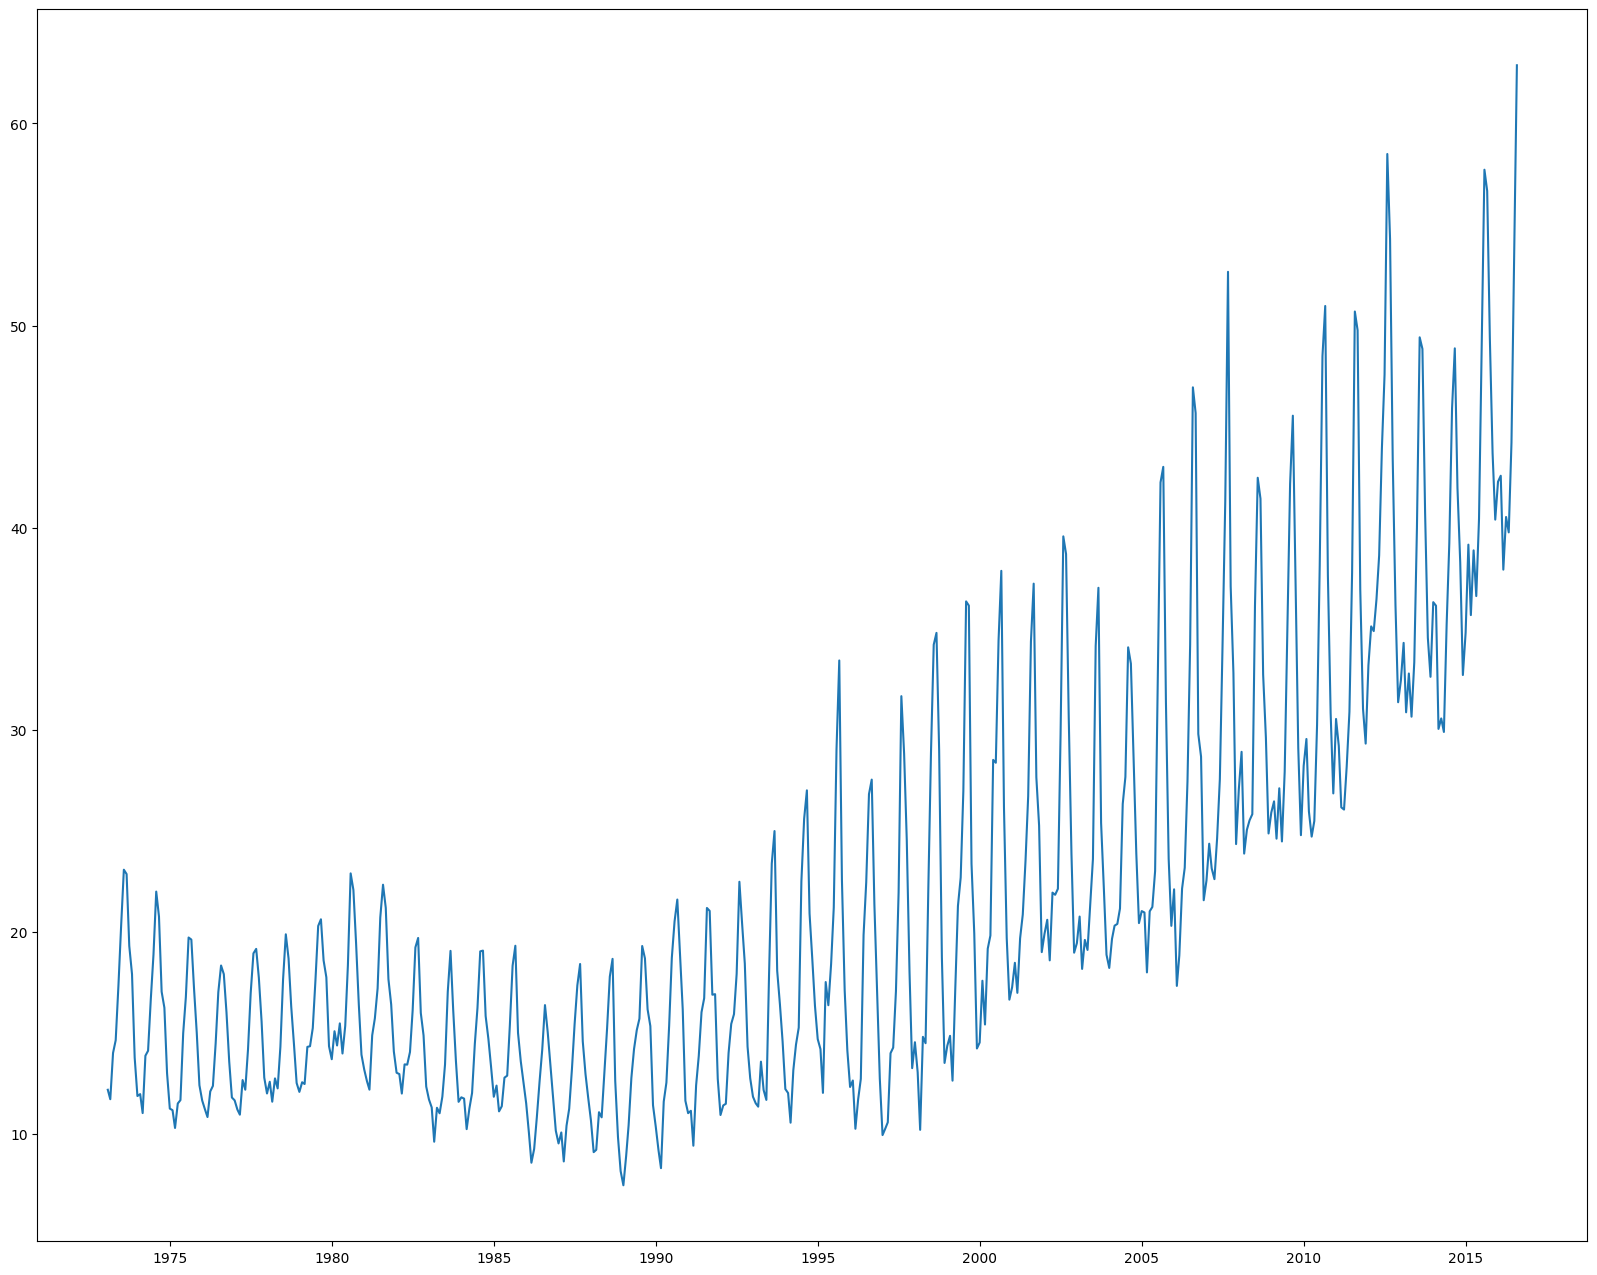

In [28]:
plt.plot(mte)

## 3.1.2 Dickey-Fuller Test on Stationary

In [29]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [30]:
# Import the adfuller function
from statsmodels.tsa.stattools import adfuller

# Define the TestStationaryAdfuller function
def TestStationaryAdfuller(ts, cutoff=0.01):
    ts_test = adfuller(ts, autolag='AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in ts_test[4].items():
        ts_test_output['Critical Value (%s)' % key] = value
    print(ts_test_output)

    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

### Testing the monthly emissions time series

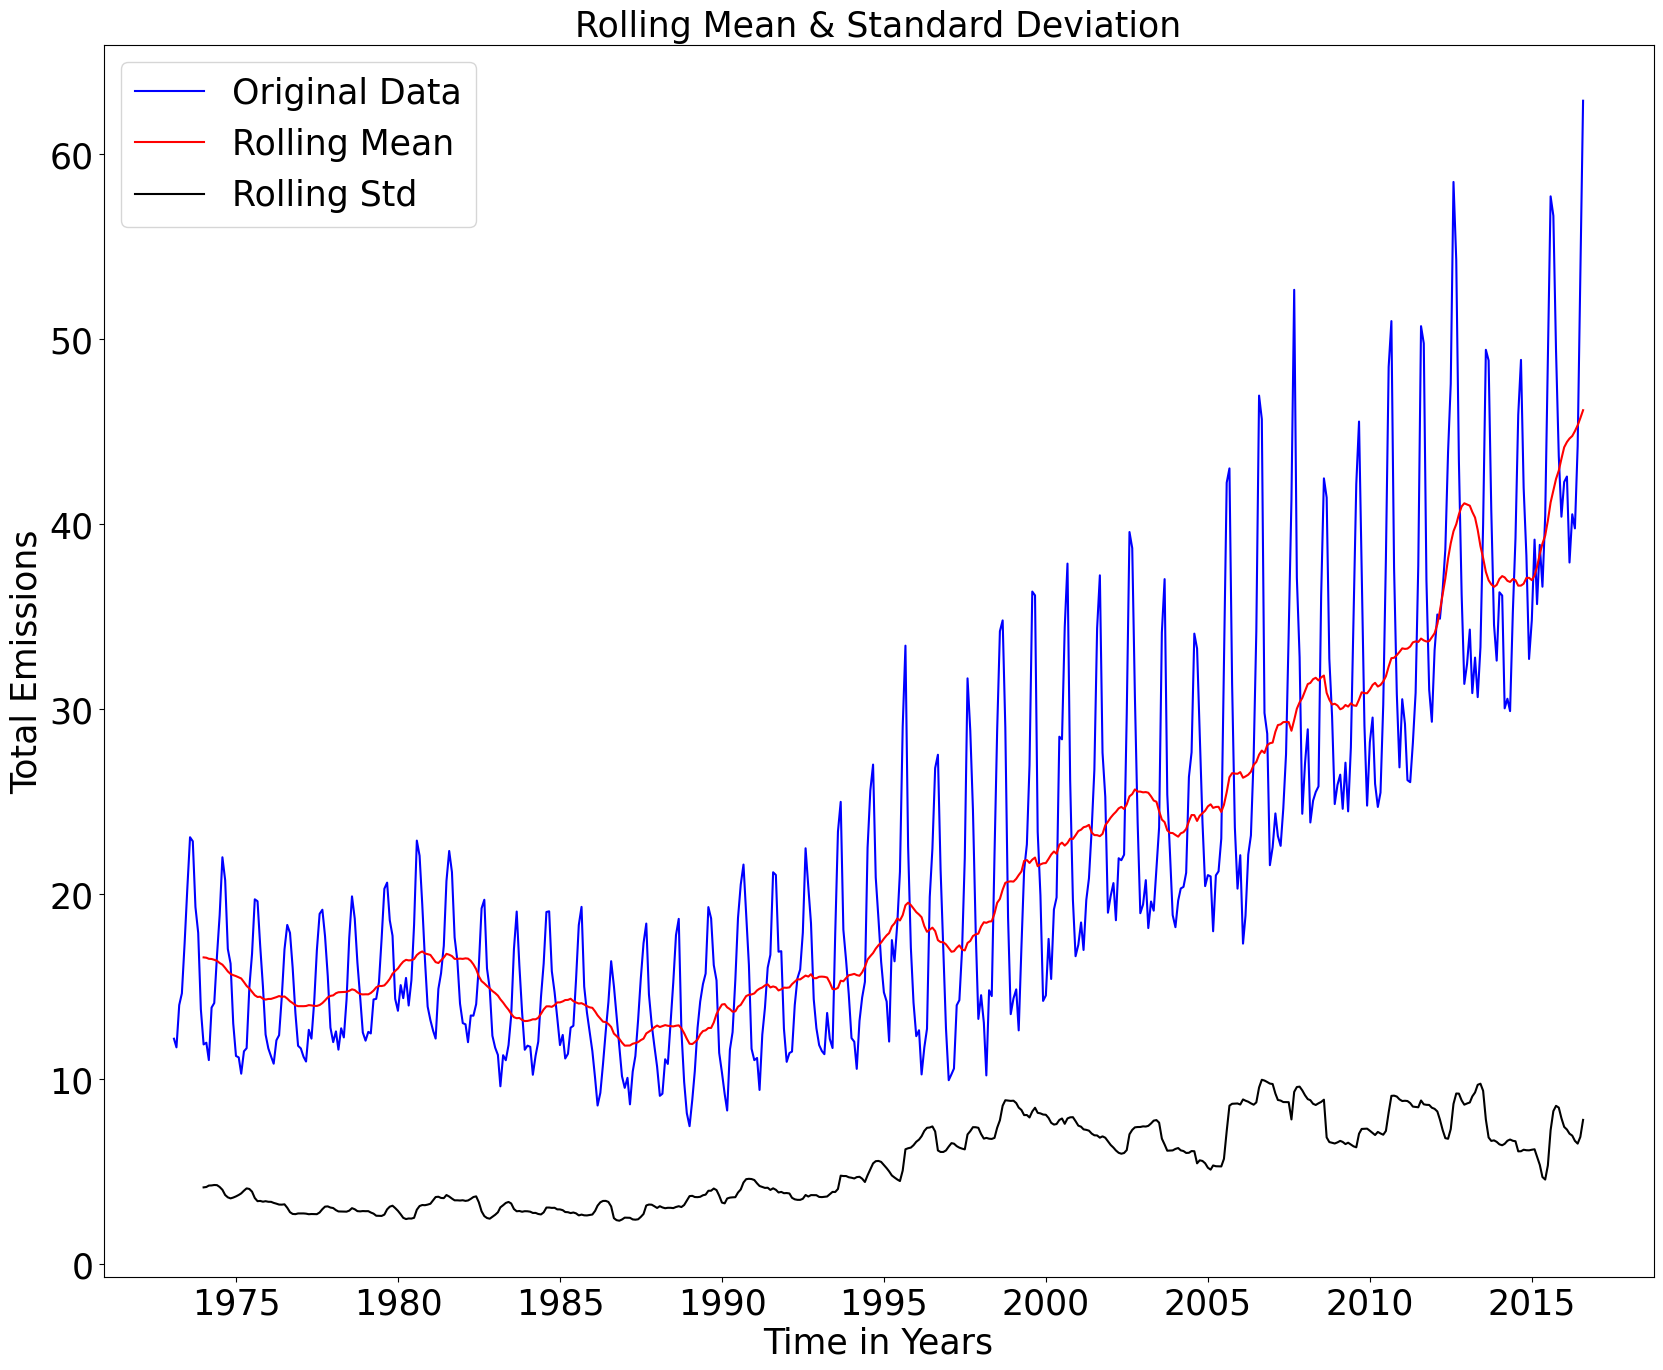

In [31]:
TestStationaryPlot(mte)

In [32]:
TestStationaryAdfuller(mte)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


## 3.1.3 Transform the dataset to stationary

The most common techniques used to estimate or model trend and then remove it from the time series are 
- Aggregation – taking average for a time period like monthly/weekly average
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

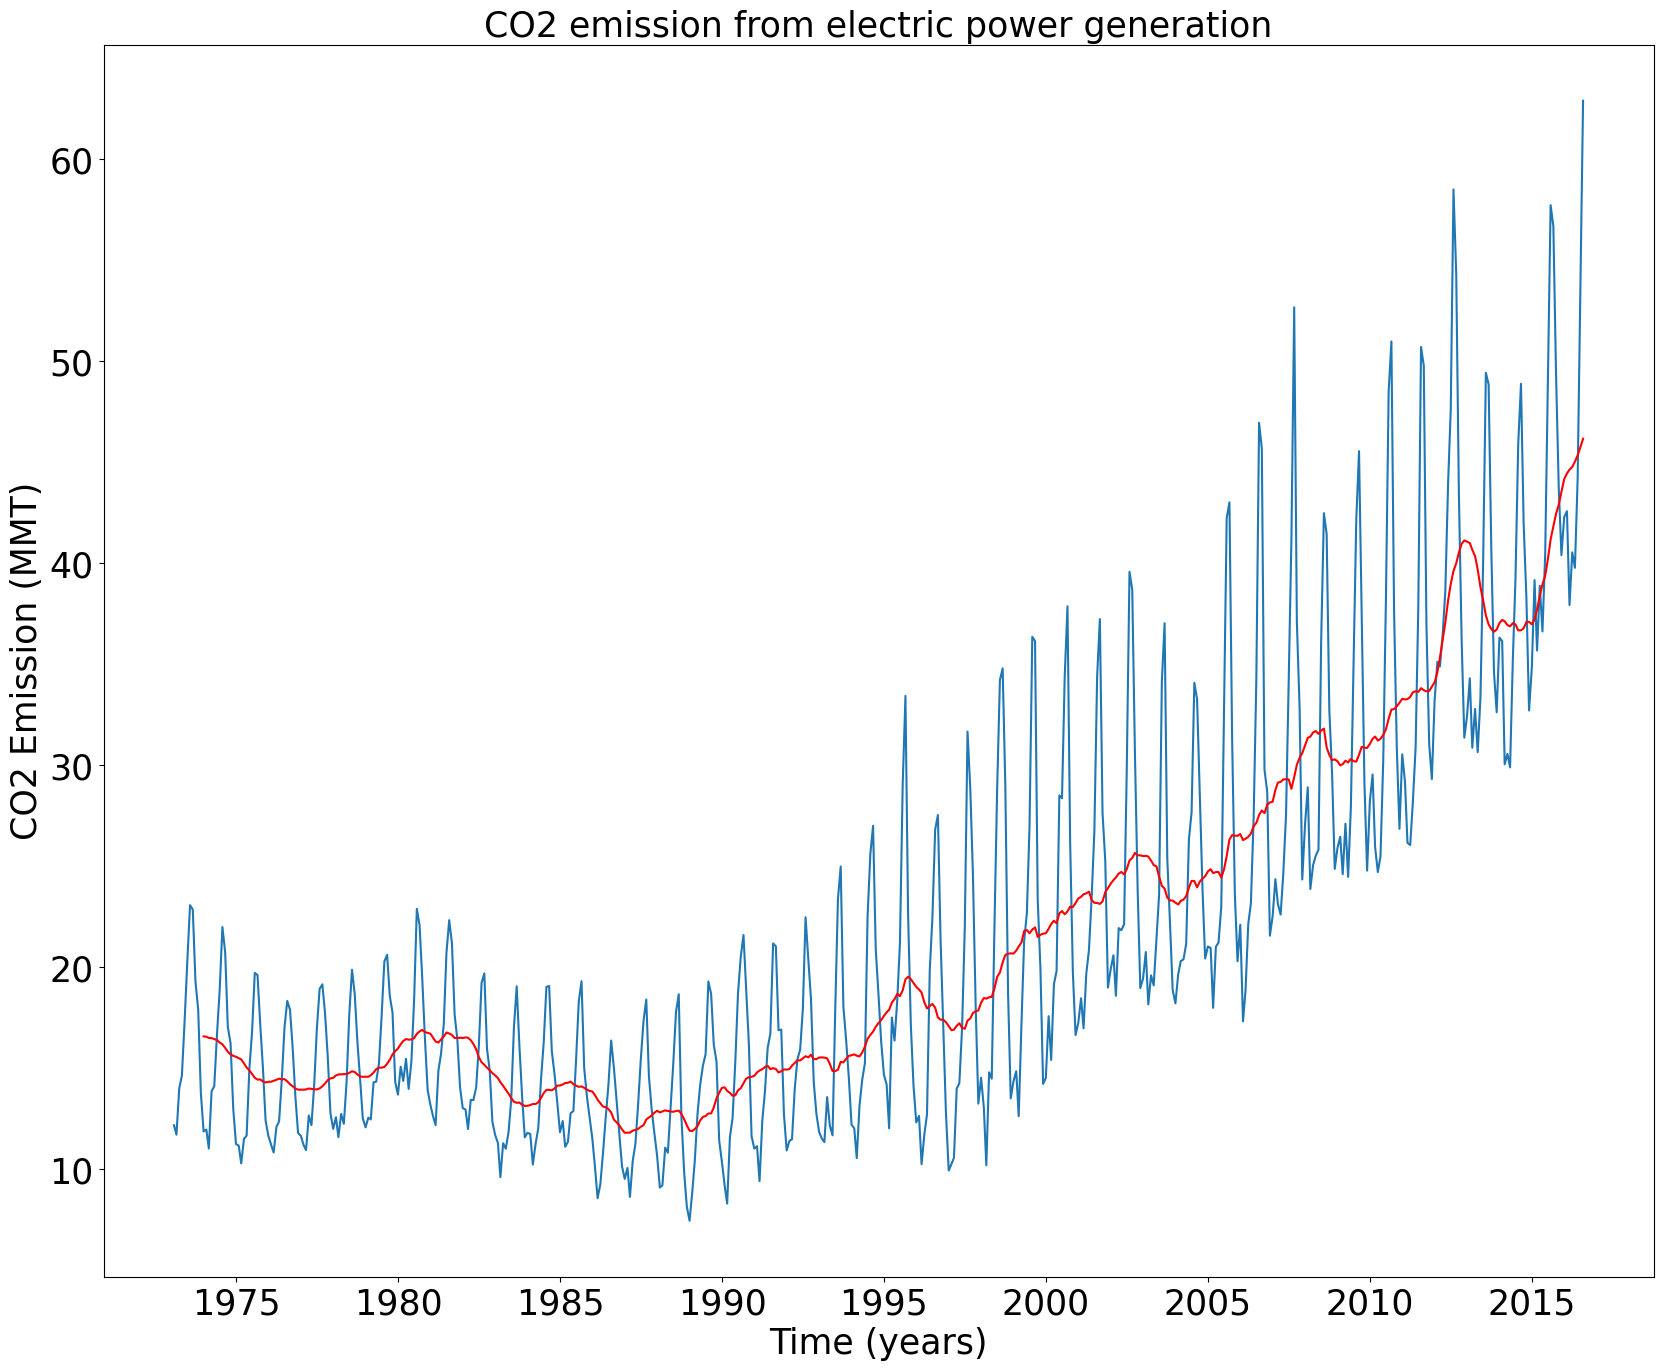

In [33]:
### Moving Average

moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

In [34]:
mte_moving_avg_diff = mte - moving_avg
mte_moving_avg_diff.head(12)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
Freq: ME, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

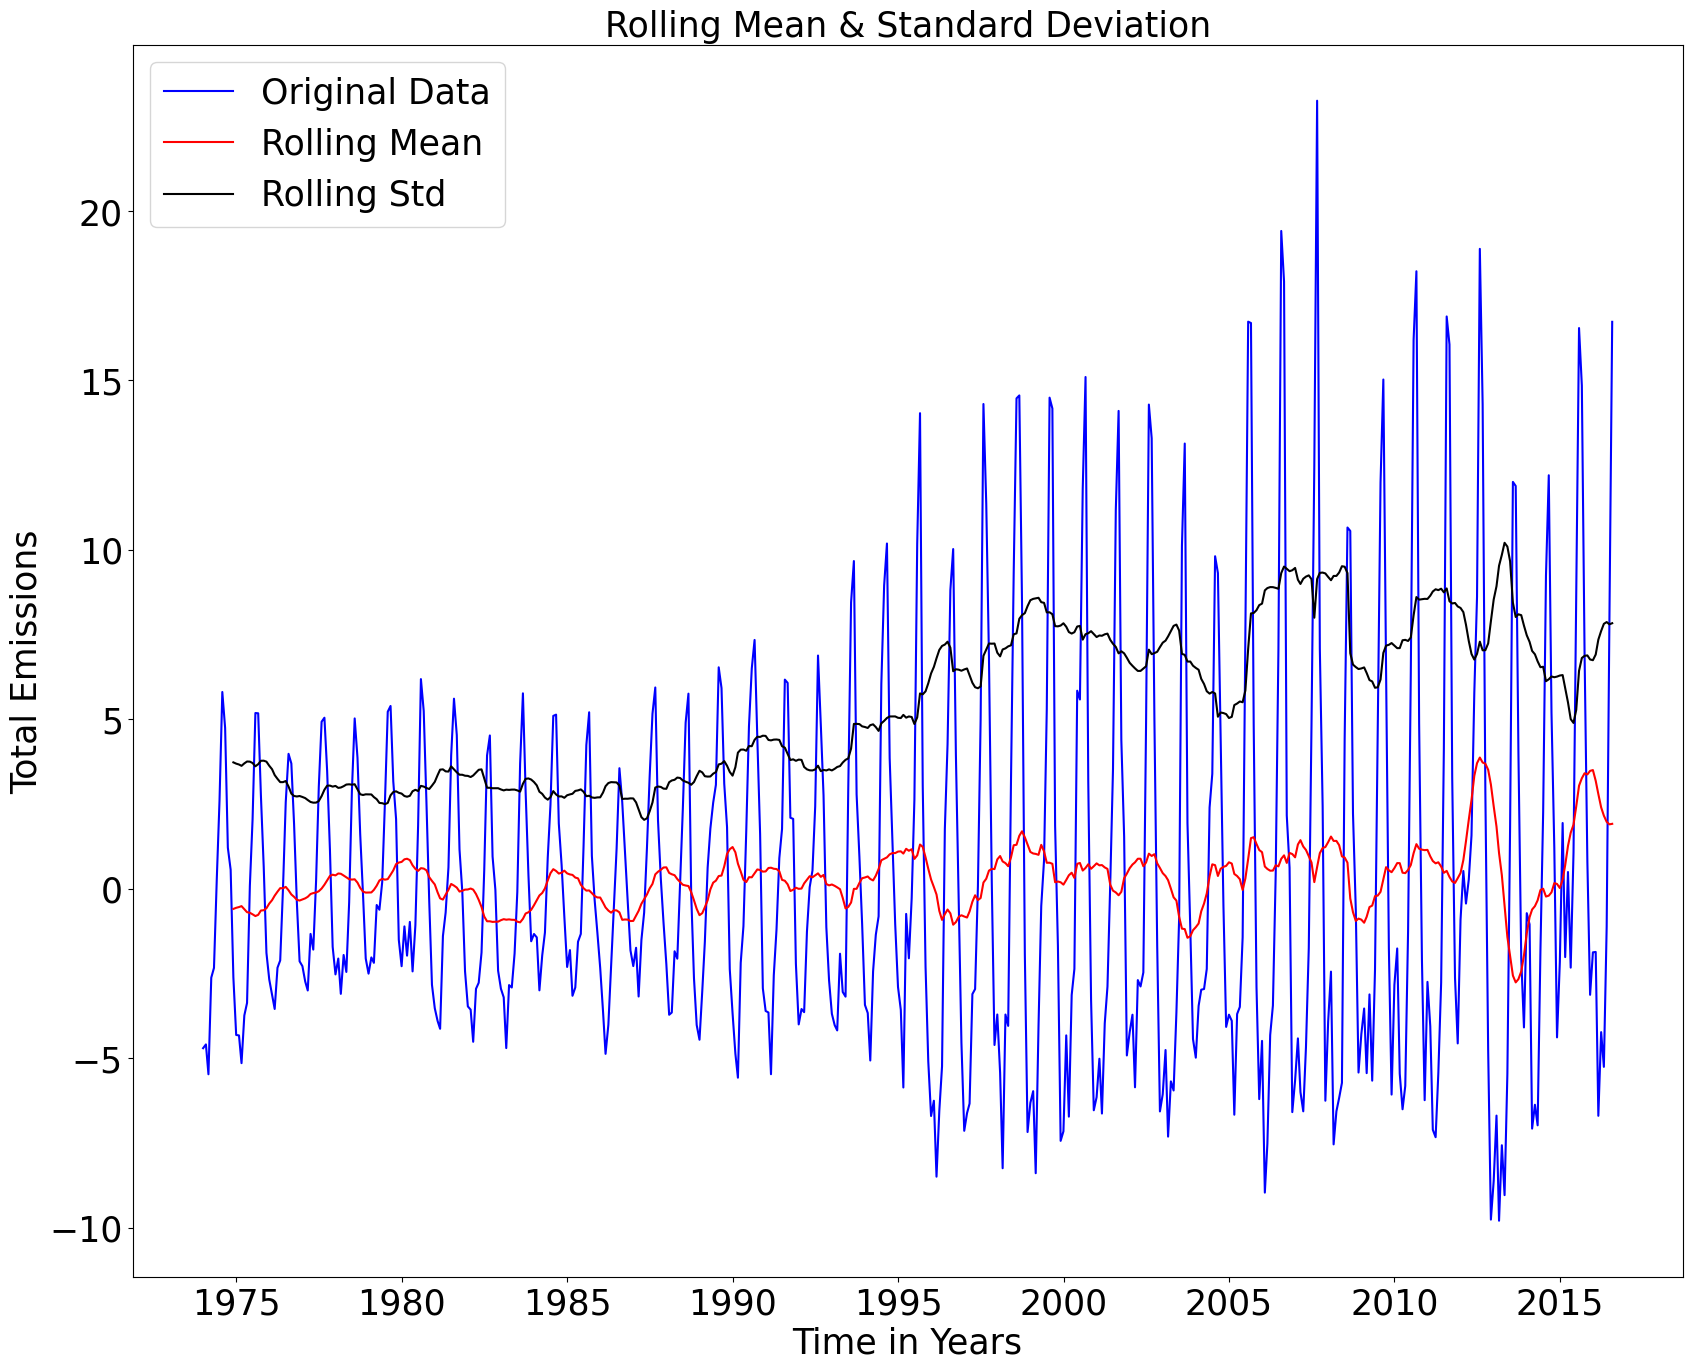

In [35]:
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [36]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


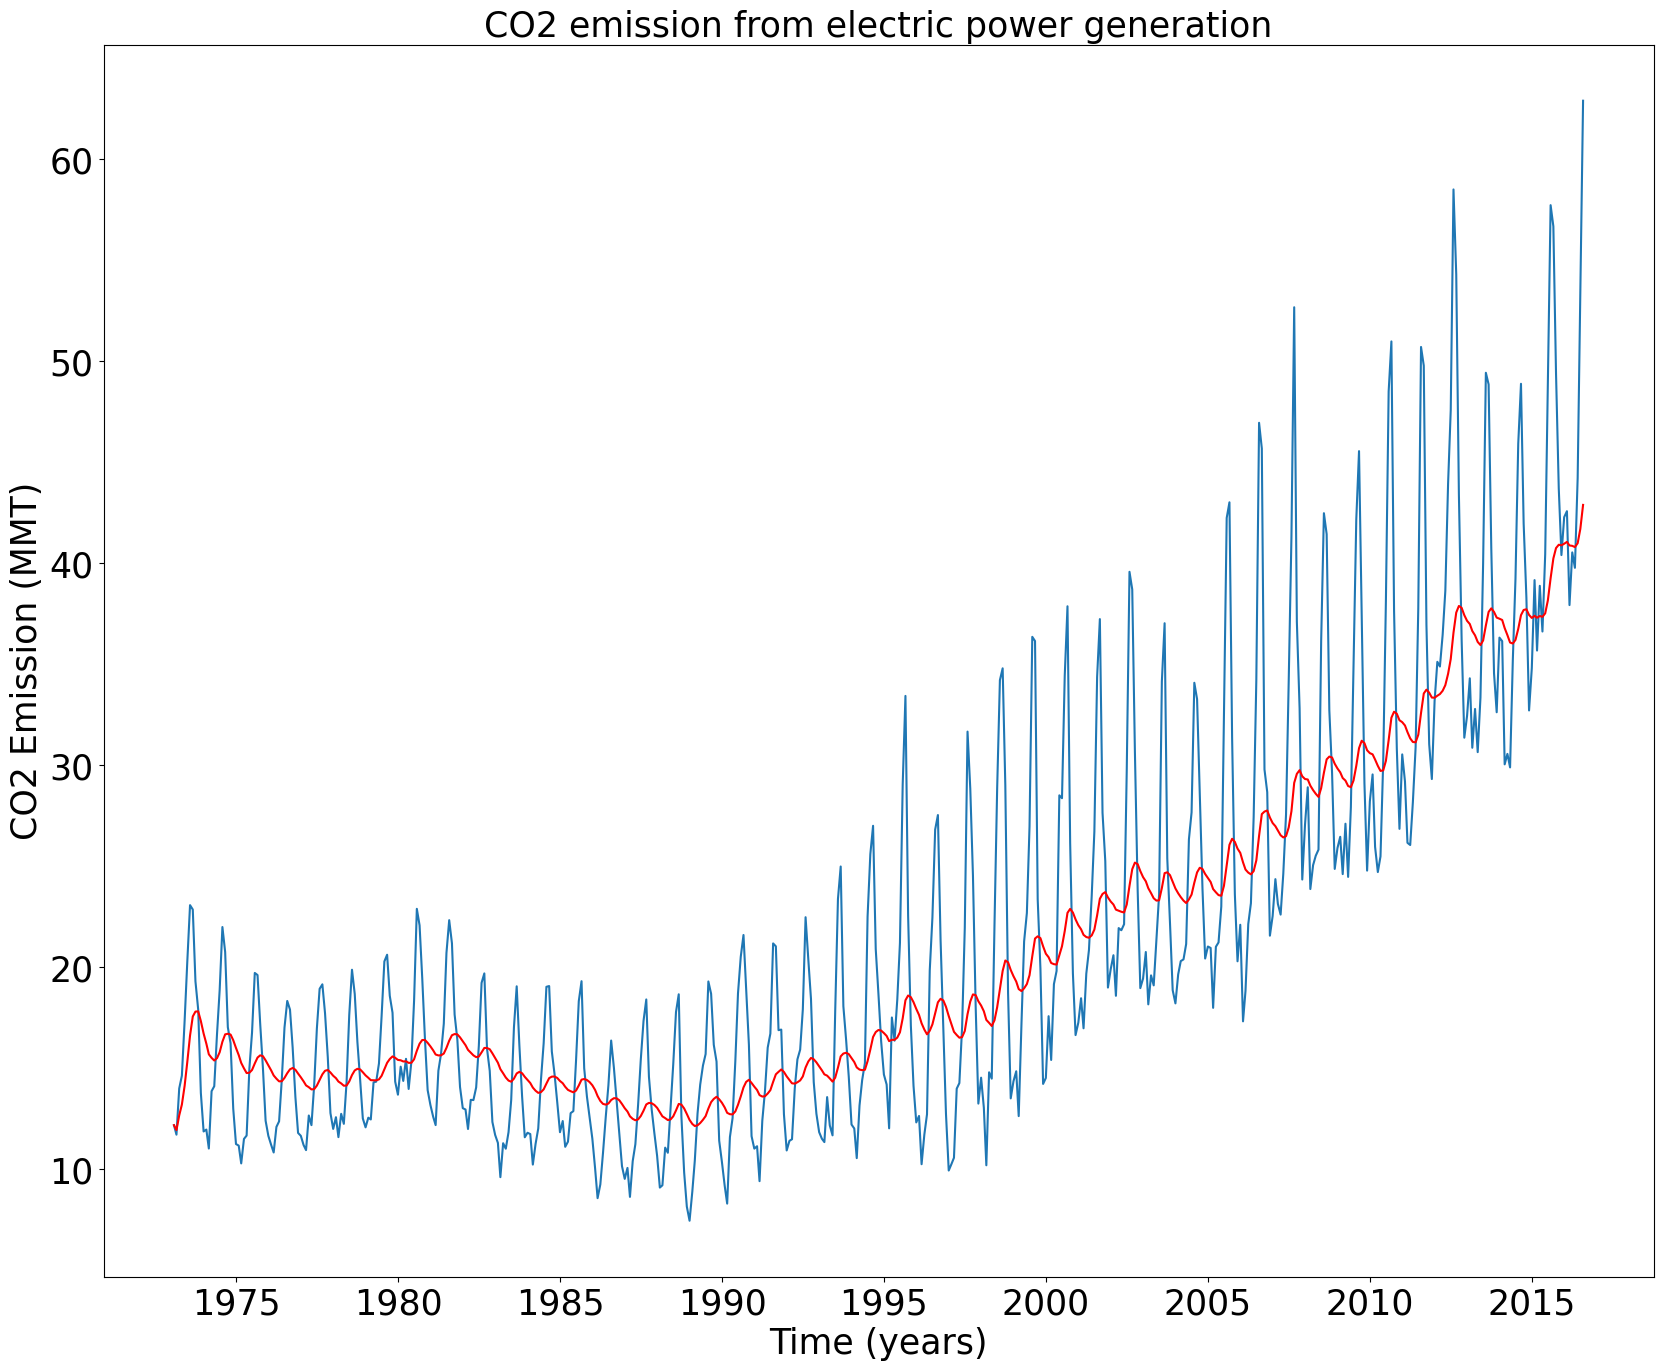

In [37]:
## Exponential Weighted Moving Average

mte_exp_wighted_avg = mte.ewm(halflife=12).mean()
plt.plot(mte)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

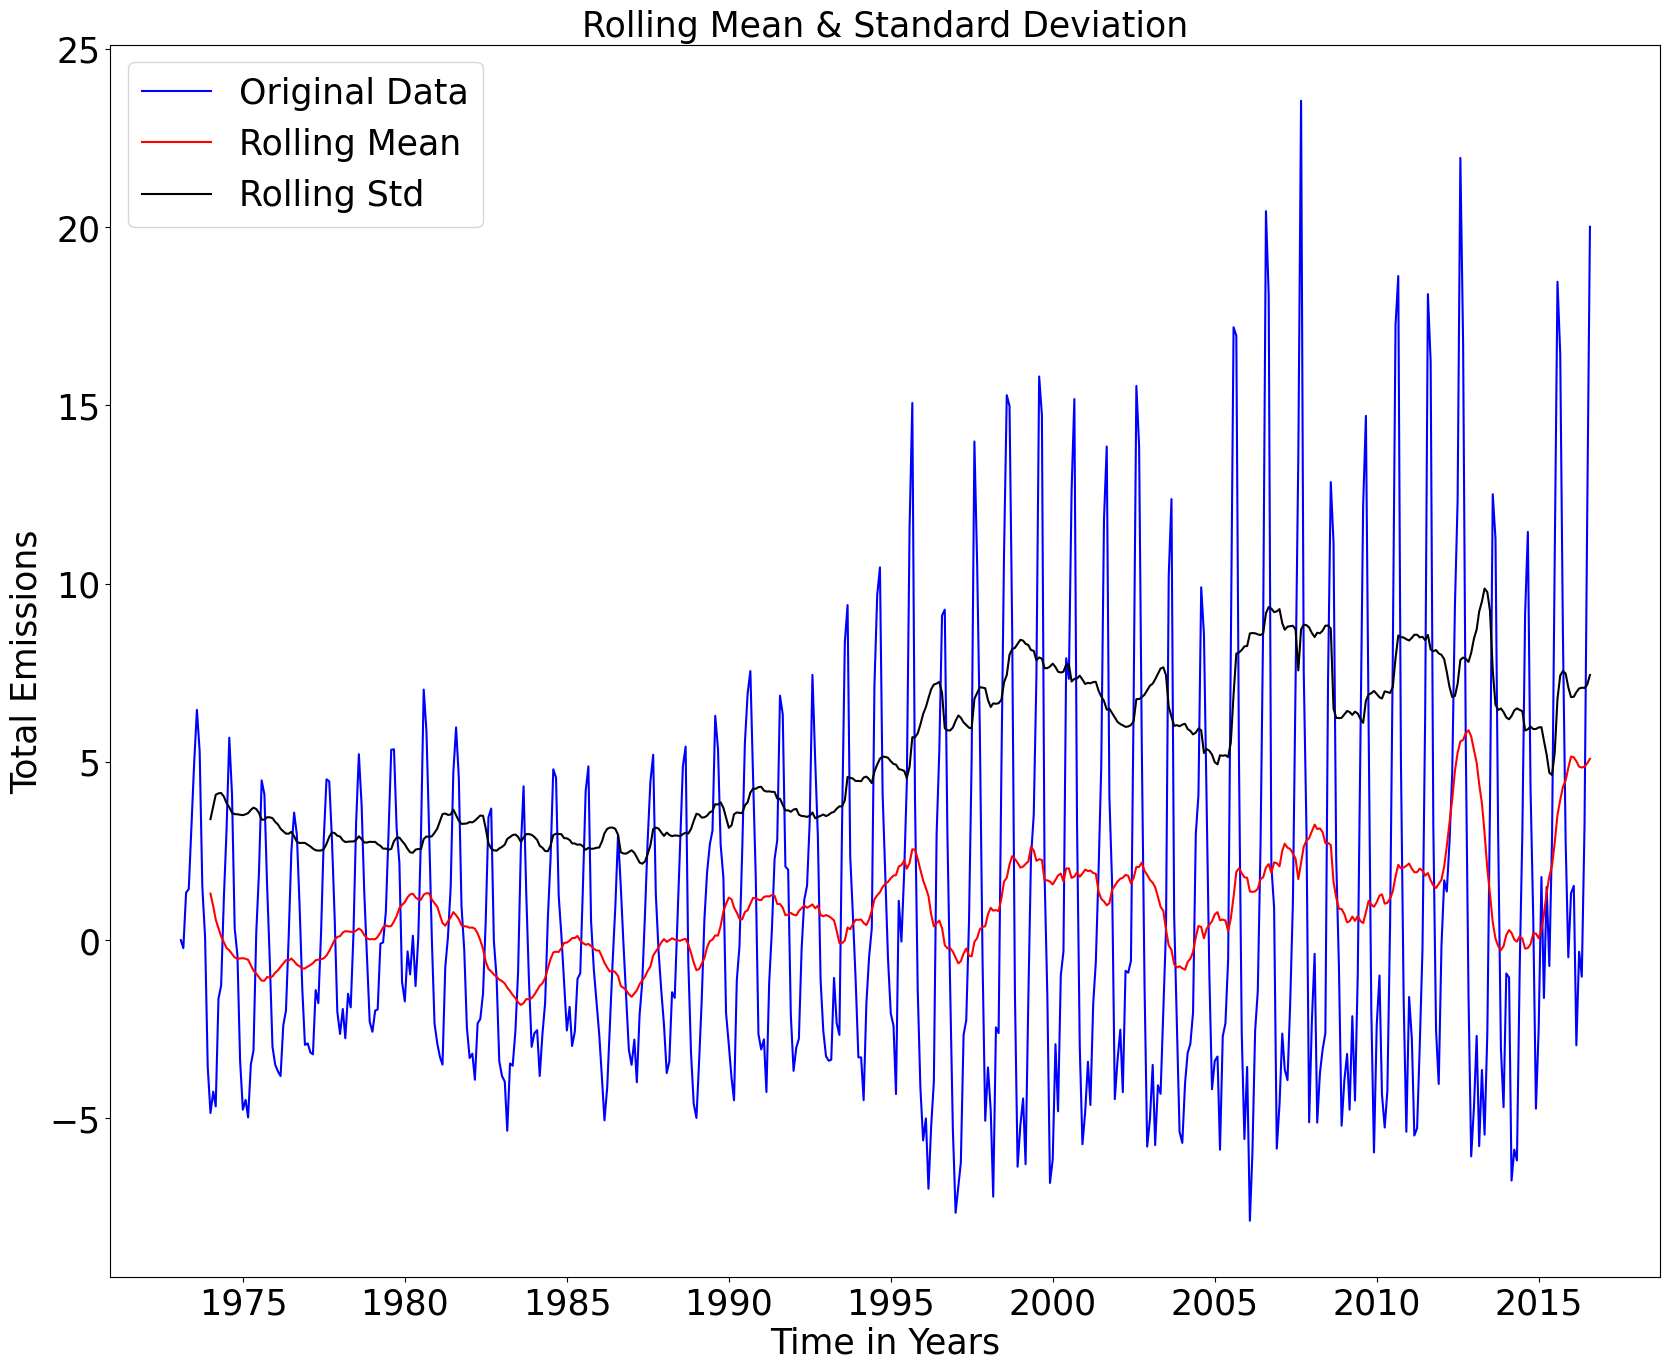

In [38]:
mte_ewma_diff = mte - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [39]:
TestStationaryAdfuller(mte_ewma_diff)

Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


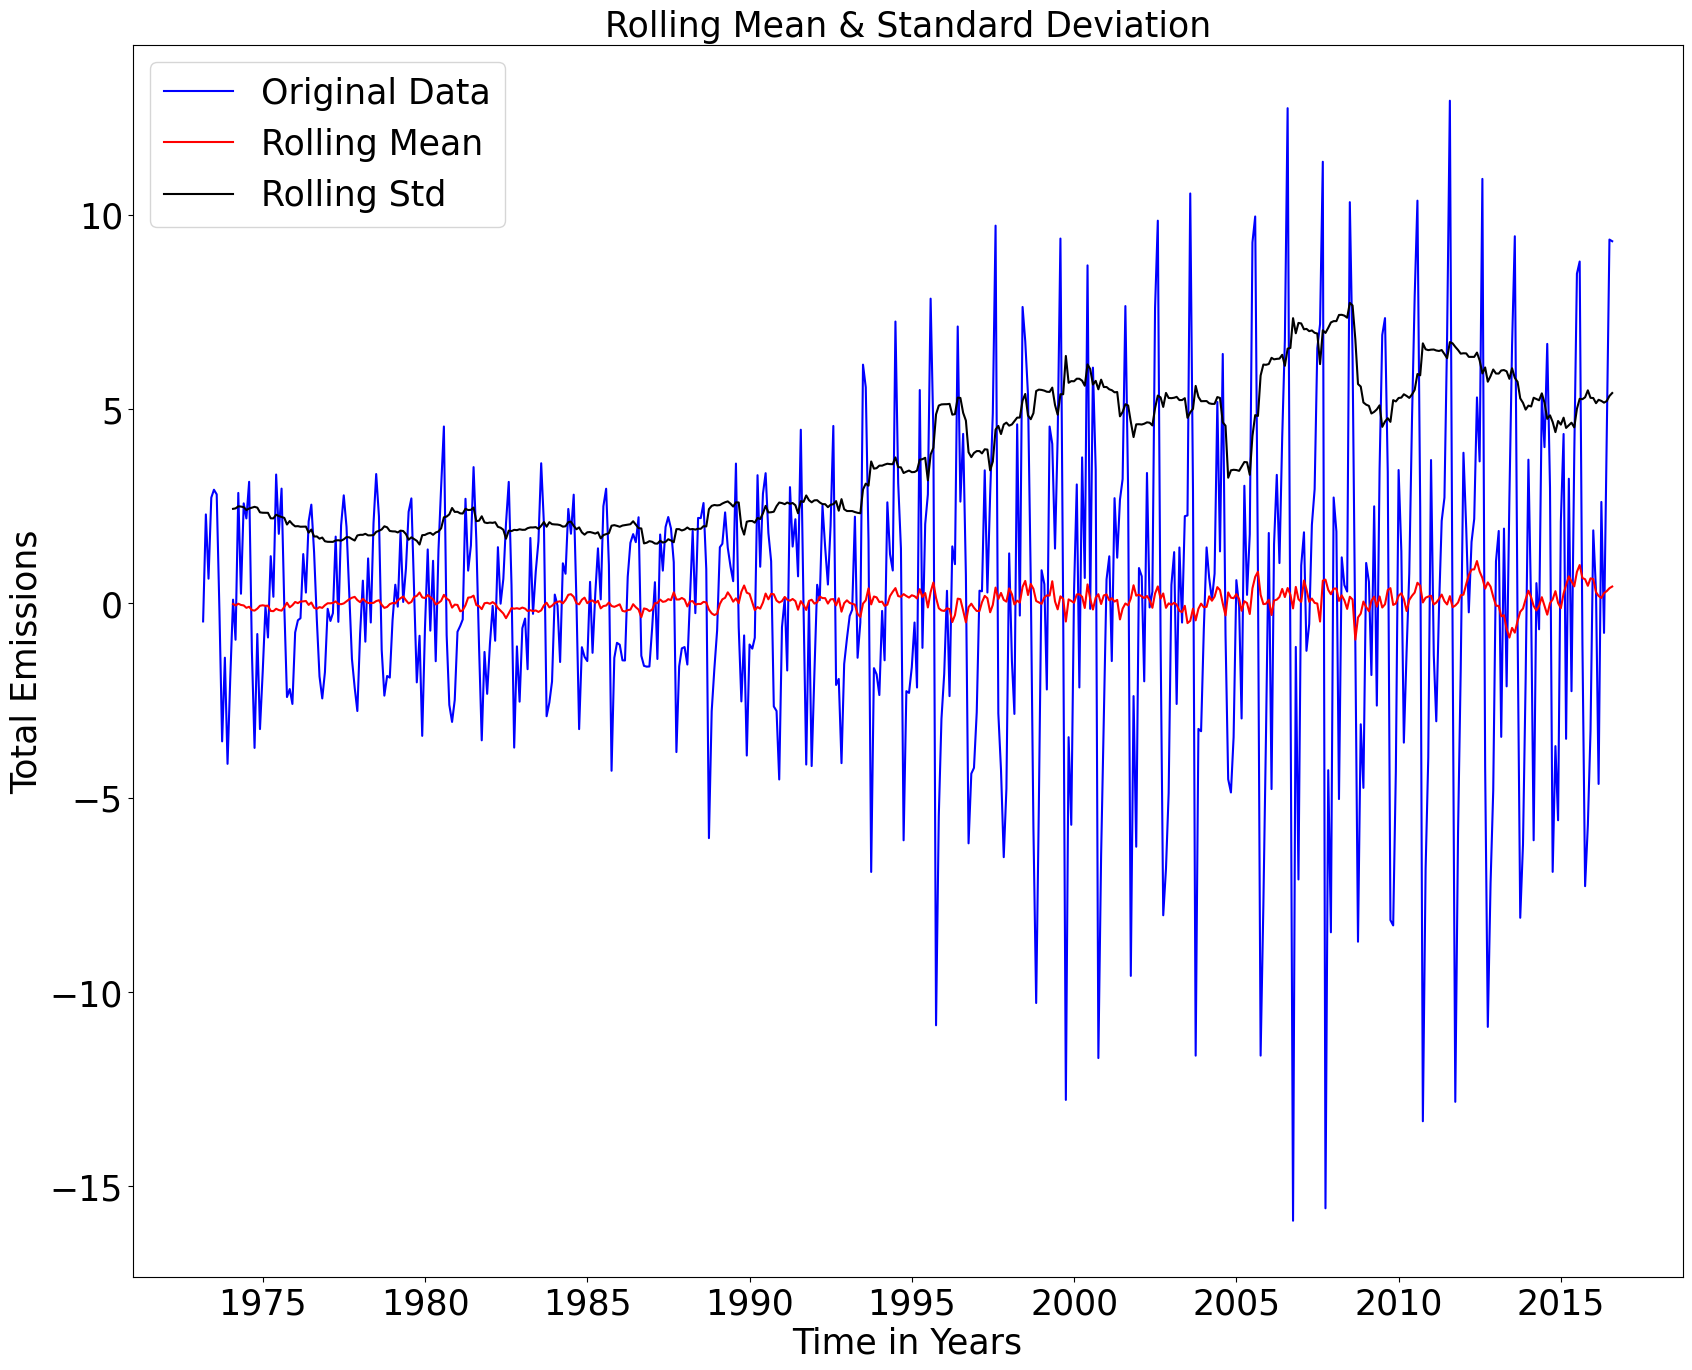

In [40]:
## C) Eliminating trend and seasonality: Differencing

mte_first_difference = mte - mte.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [41]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


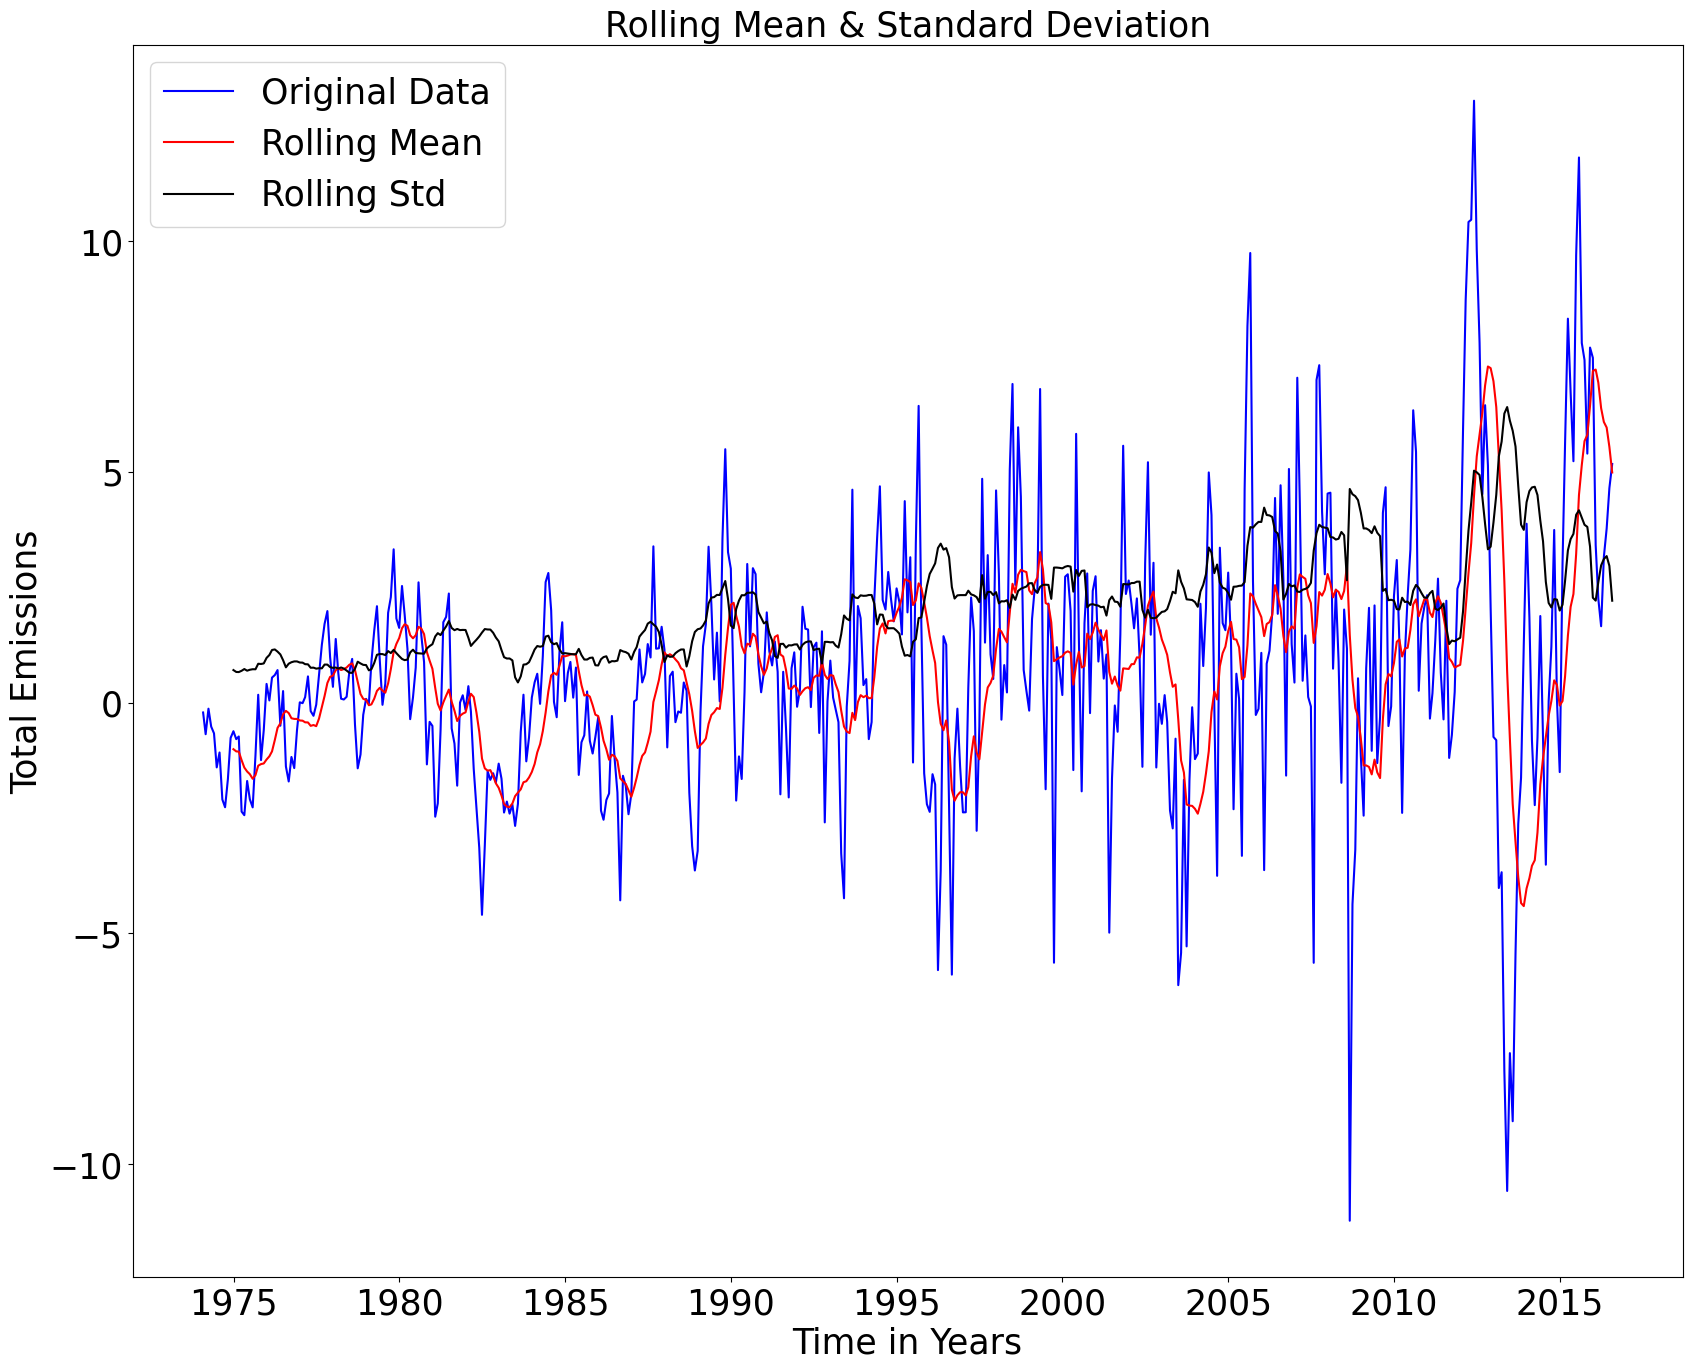

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [42]:
mte_seasonal_difference = mte - mte.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

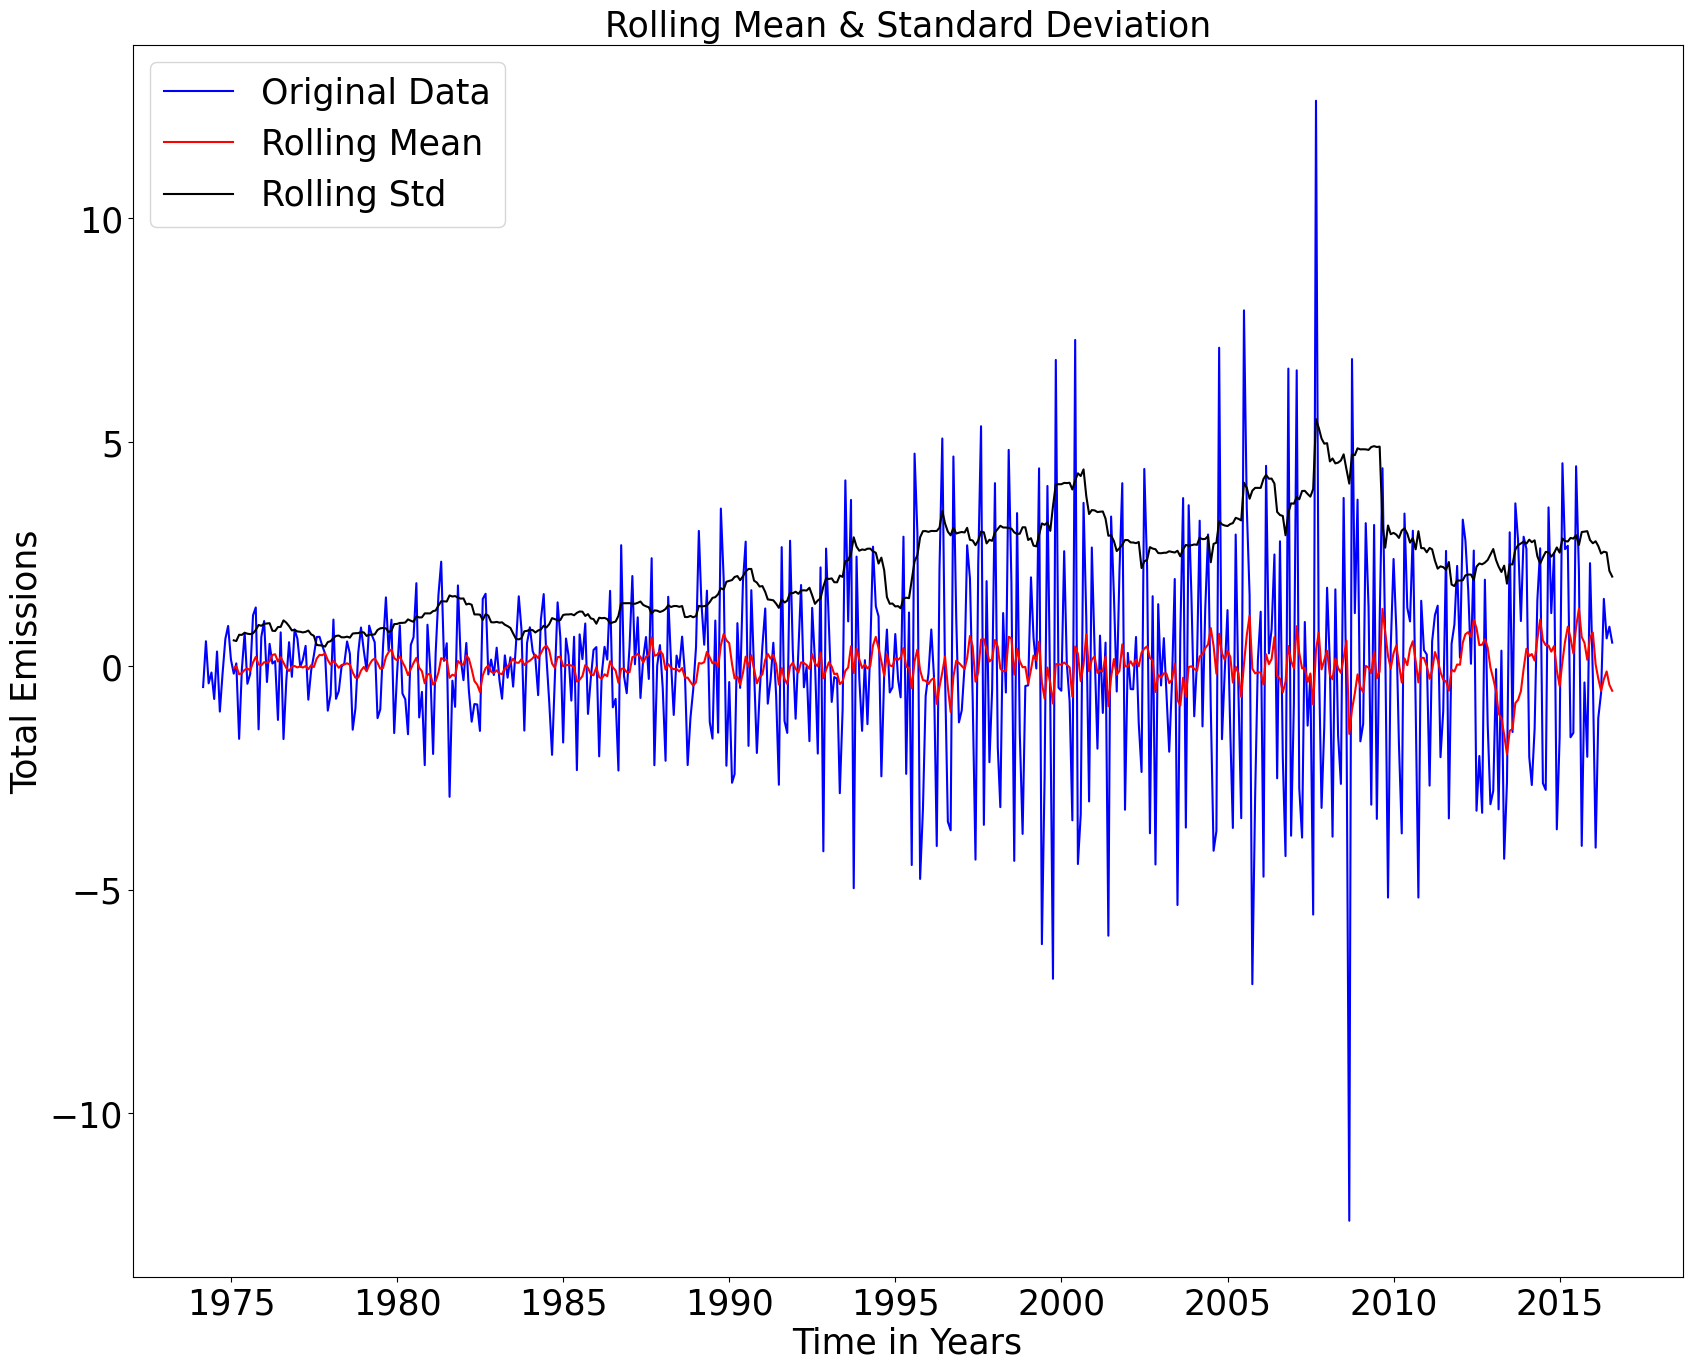

In [43]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [44]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


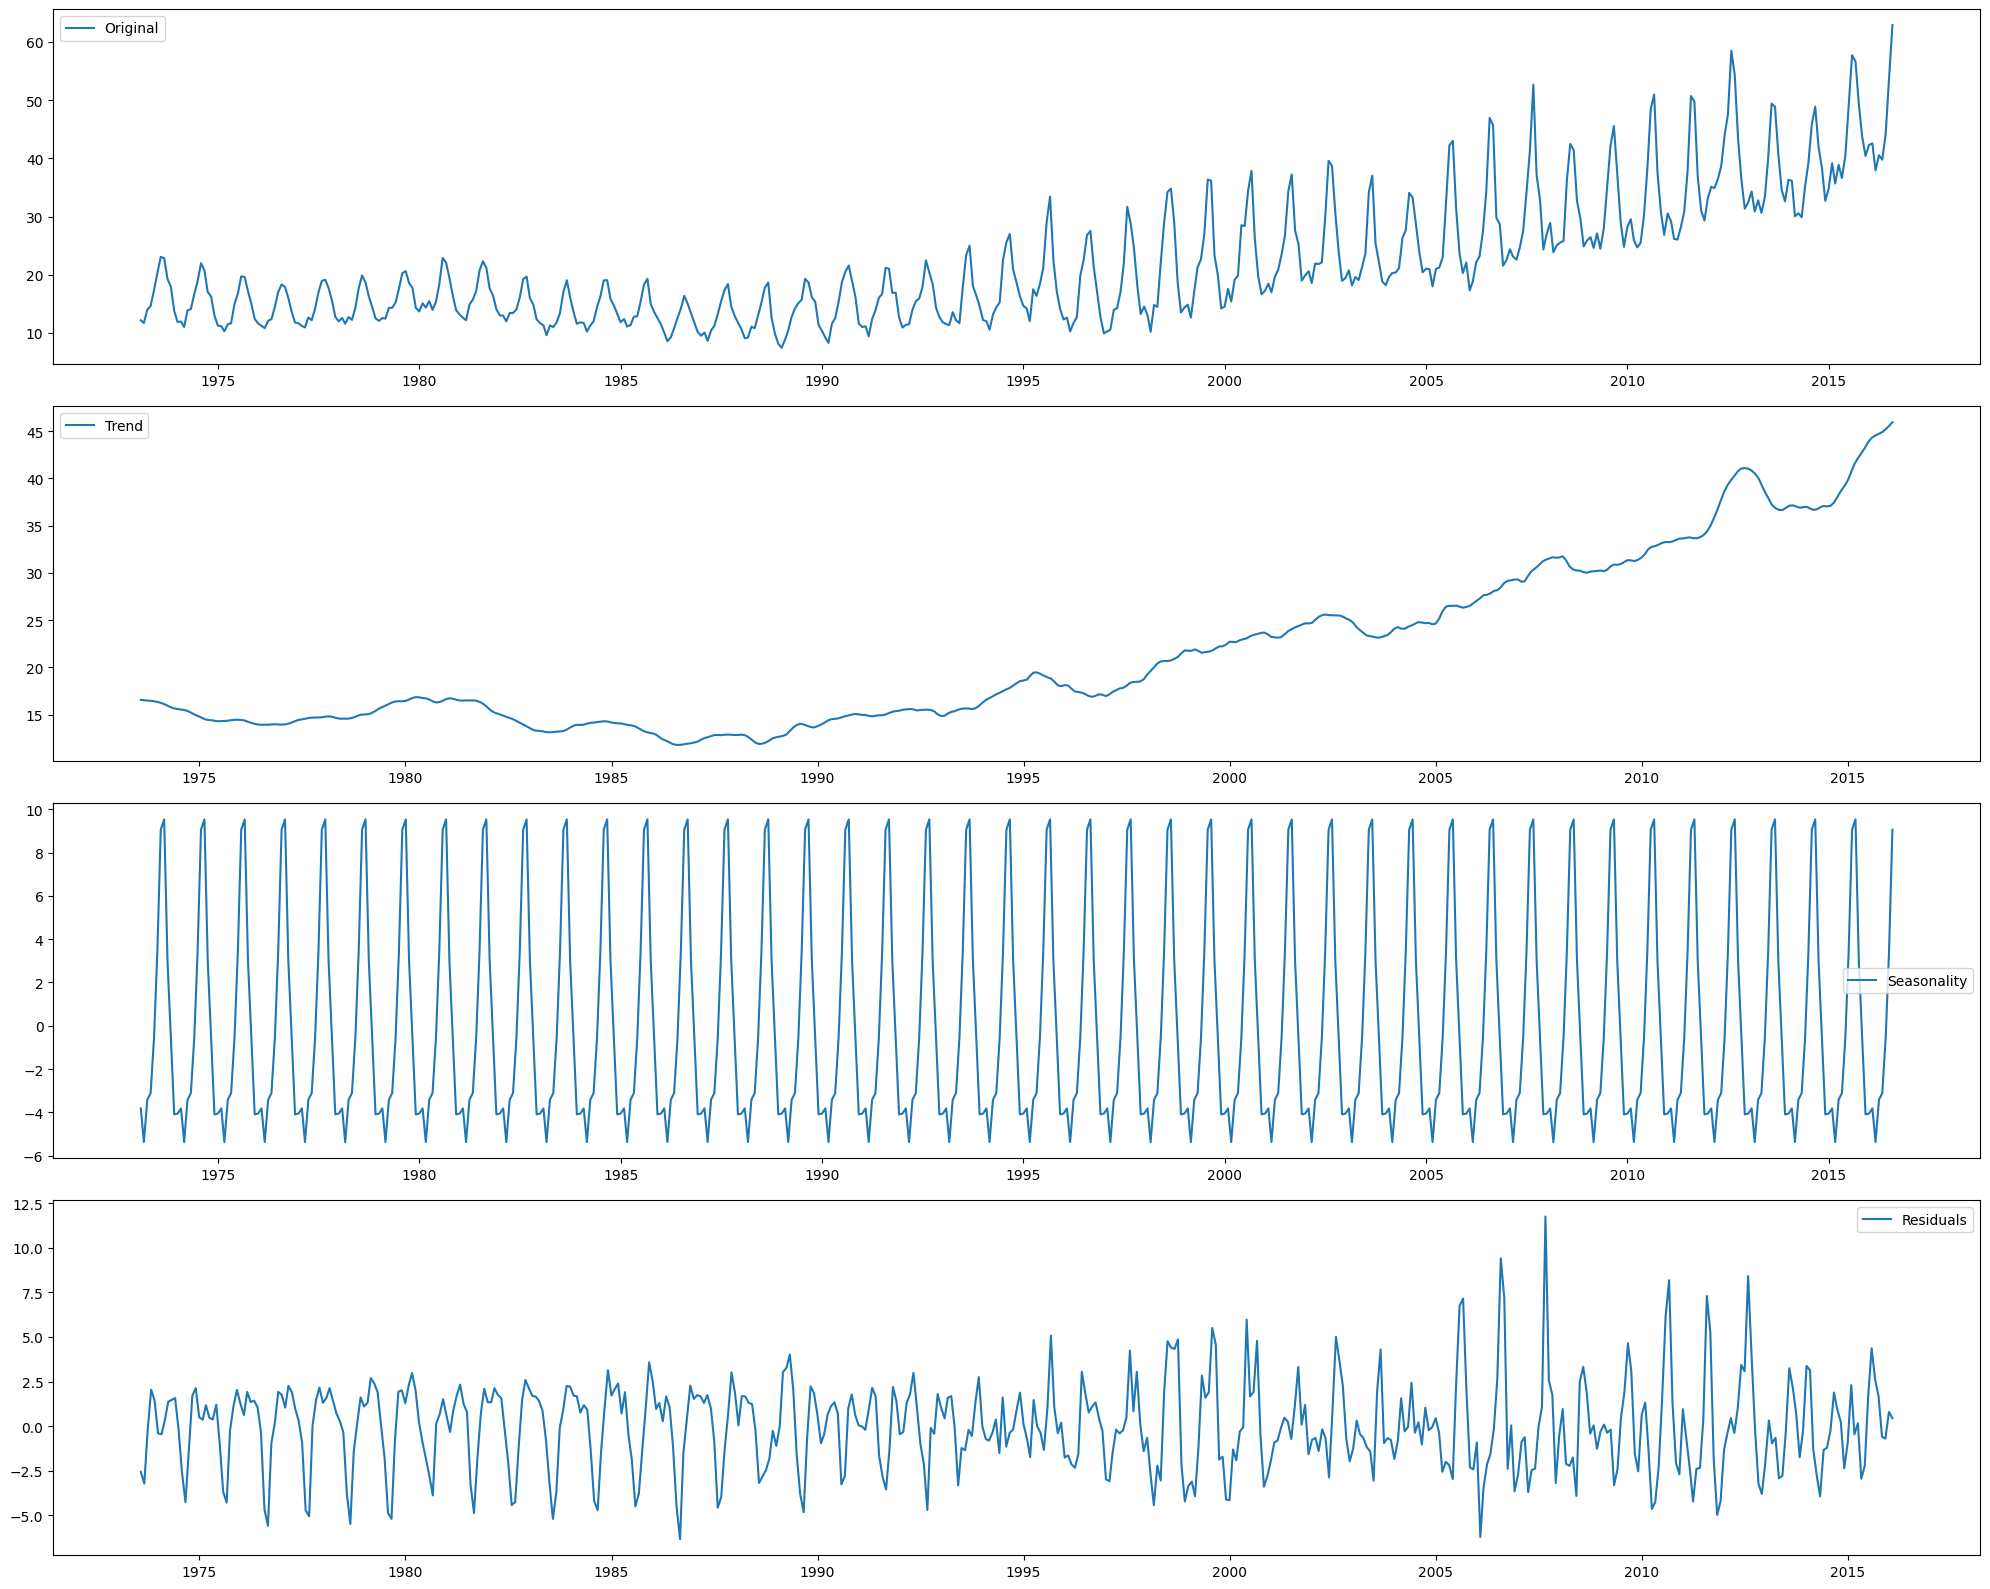

In [45]:
## D) Eliminating trend and seasonality: Decomposing

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(mte)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(mte, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

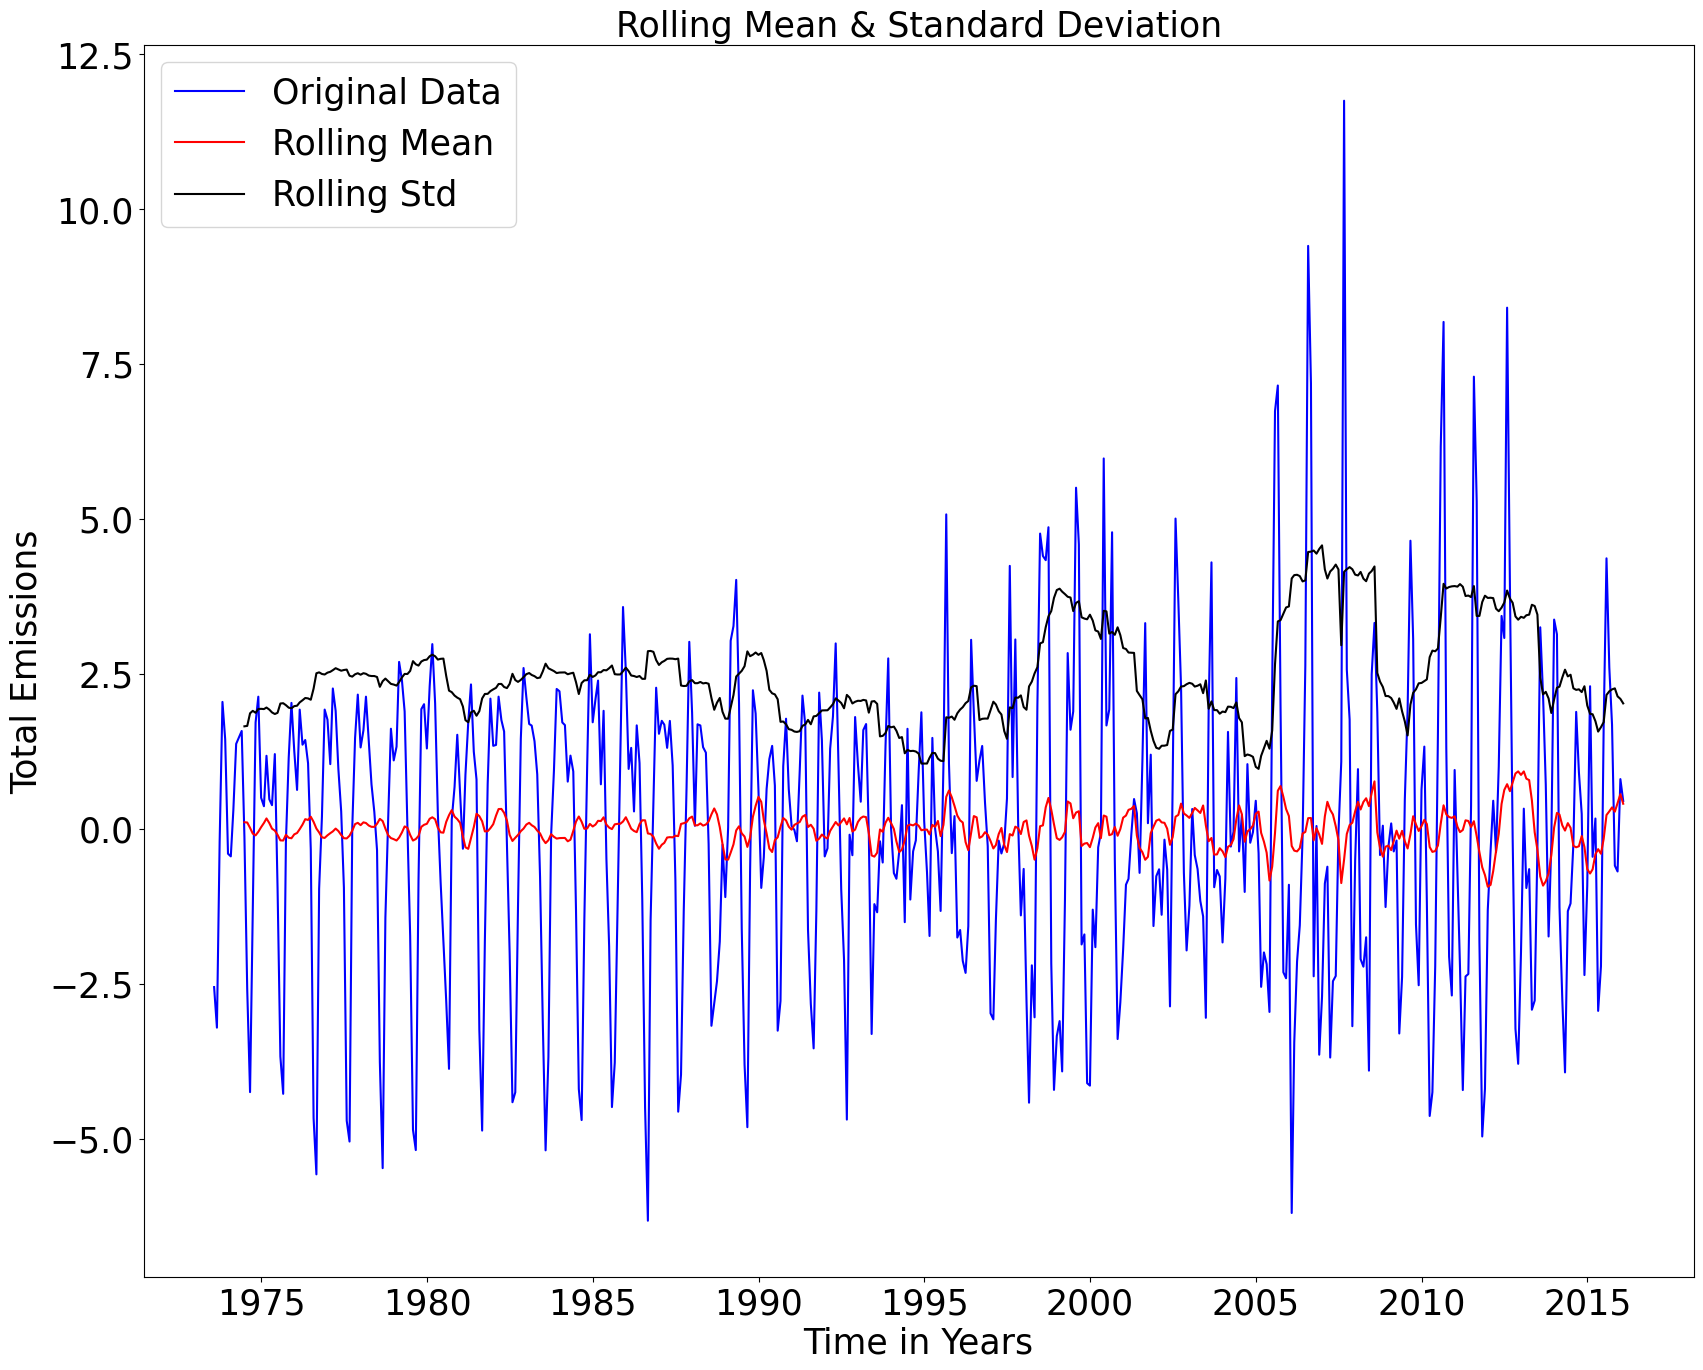

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [46]:
mte_decompose = residual
mte_decompose.dropna(inplace=True)
TestStationaryPlot(mte_decompose)
TestStationaryAdfuller(mte_decompose)

# 4) Find optimal parameters and build SARIMA model

When looking to fit time series dataset with seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)(P,D,Q)s that optimize our metric of interest. Before moving directly how to find the optimal values of the parameters let us see the two situations in stationarities: A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as **white noise.** The second case being a series with significant dependence among values and needs statistical models like ARIMA to forecast future oucomes.

# 4.1 Plot the ACF and PACF charts and find the optimal parameters

the next step will be determing the tuning parameters (p and q) of the model by looking at the autocorrelation and partial autocorrelation graphs.  The chart below provides a brief guide on how to read the autocorrelation and partial autocorrelation graphs inorder to select the parameters. 

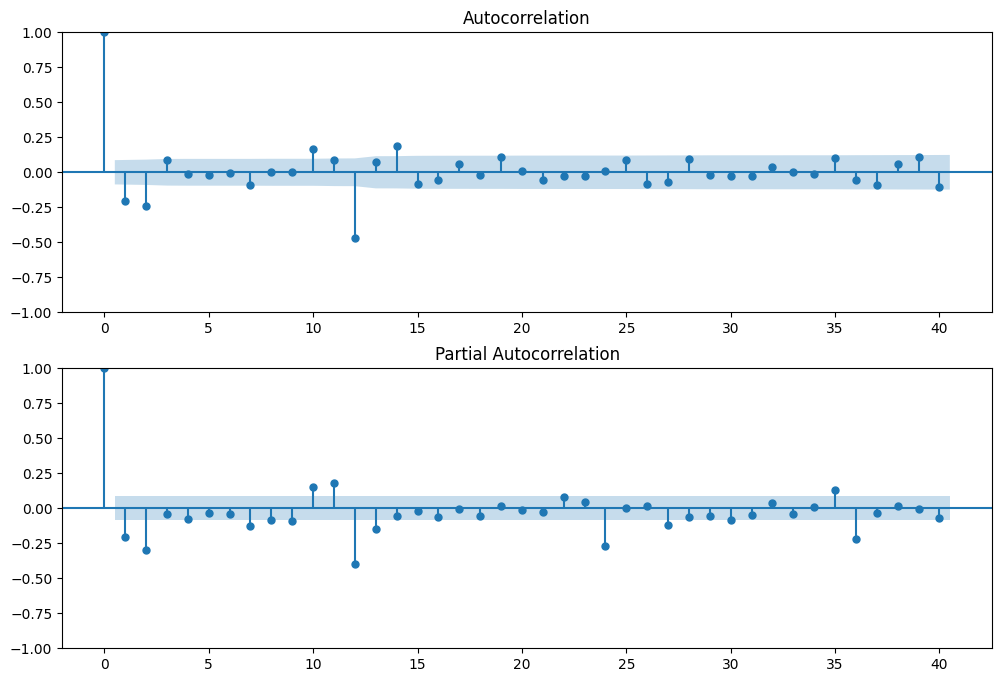

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

# 4.2 Grid search 

In [48]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[2]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)


In [49]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [50]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            model = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [51]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [52]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
if len(a) == len(b) == len(c):
    wf['pdq'] = a
    wf['pdq_x_QDQs'] = b
    wf['aic'] = c
    print(wf[wf['aic'] == wf['aic'].min()])
else:
    print("Error: Lengths of a, b, and c do not match.")

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091218
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.625648186427
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.194757744371
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.20950283584
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.146426616797
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.1472629970094
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.8402380709176
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.561225515748
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.105901404882
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.724725408497
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.507386420706
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.0446013856854
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.6800977751172
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.0627979899496
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.532772188897
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.012810818768
ARIMA

In [53]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6681      0.040     16.616      0.000       0.589       0.747
ma.L1         -0.9538      0.020    -47.145      0.000      -0.993      -0.914
ar.S.L12      -0.0007      0.007     -0.091      0.928      -0.015       0.014
ma.S.L12      -0.7284      0.027    -26.761      0.000      -0.782      -0.675
sigma2         3.2354      0.133     24.272      0.000       2.974       3.497


In [54]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                              SARIMAX Results                                              
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Tue, 30 Jul 2024   AIC                           2003.553
Time:                                                     21:20:20   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

<Axes: xlabel='YYYYMM'>

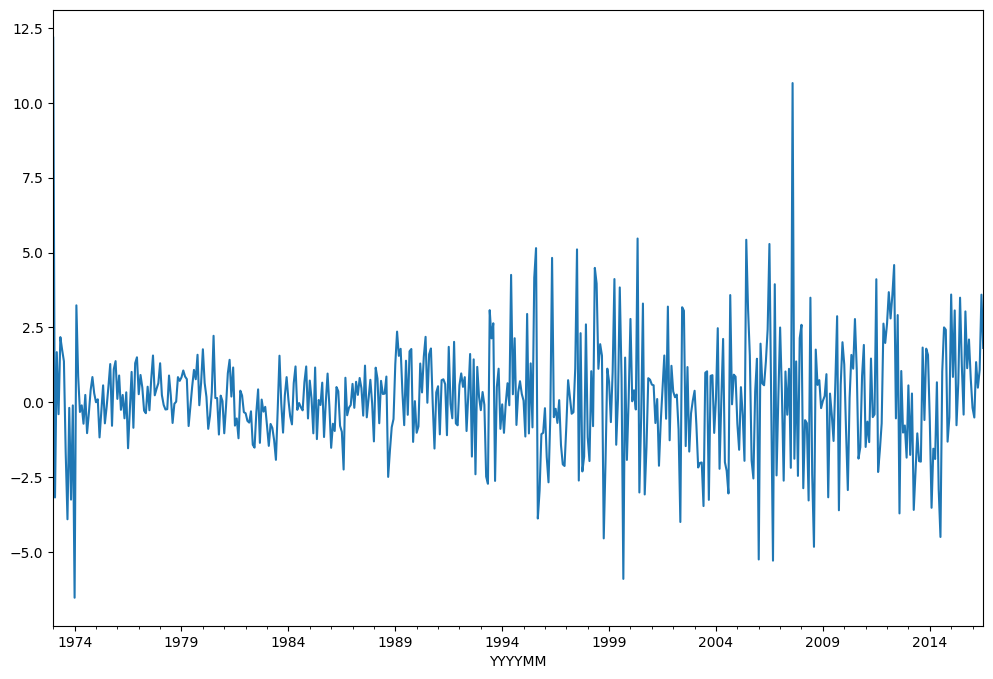

In [55]:
results.resid.plot(figsize=(12,8))

In [56]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528428
25%       -0.791260
50%        0.126975
75%        1.040648
max       12.175000
dtype: float64


<Axes: ylabel='Density'>

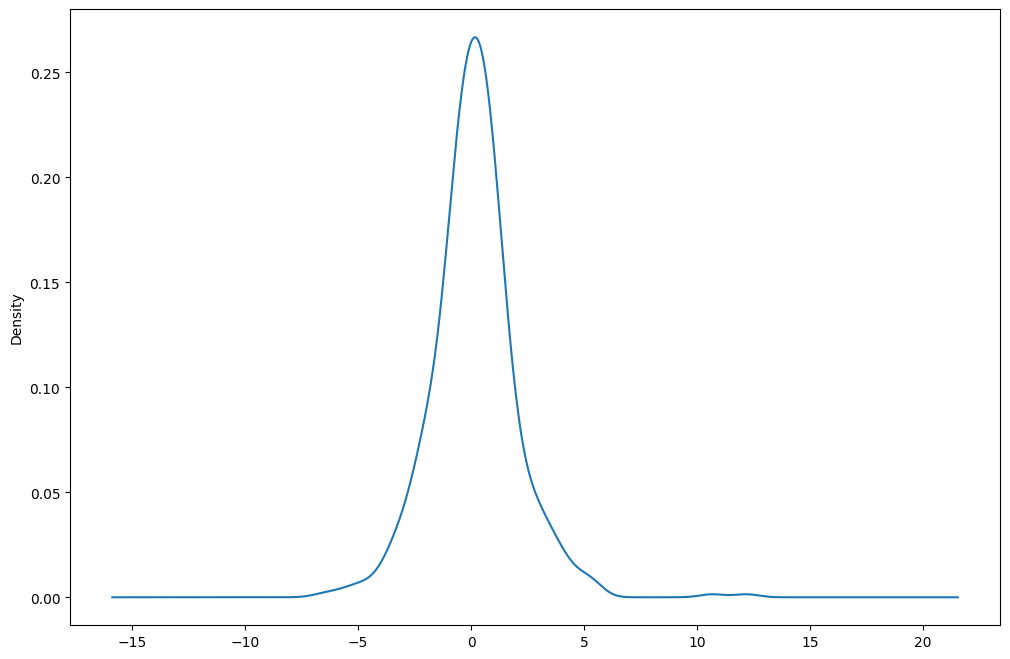

In [57]:
results.resid.plot(figsize=(12,8),kind='kde')

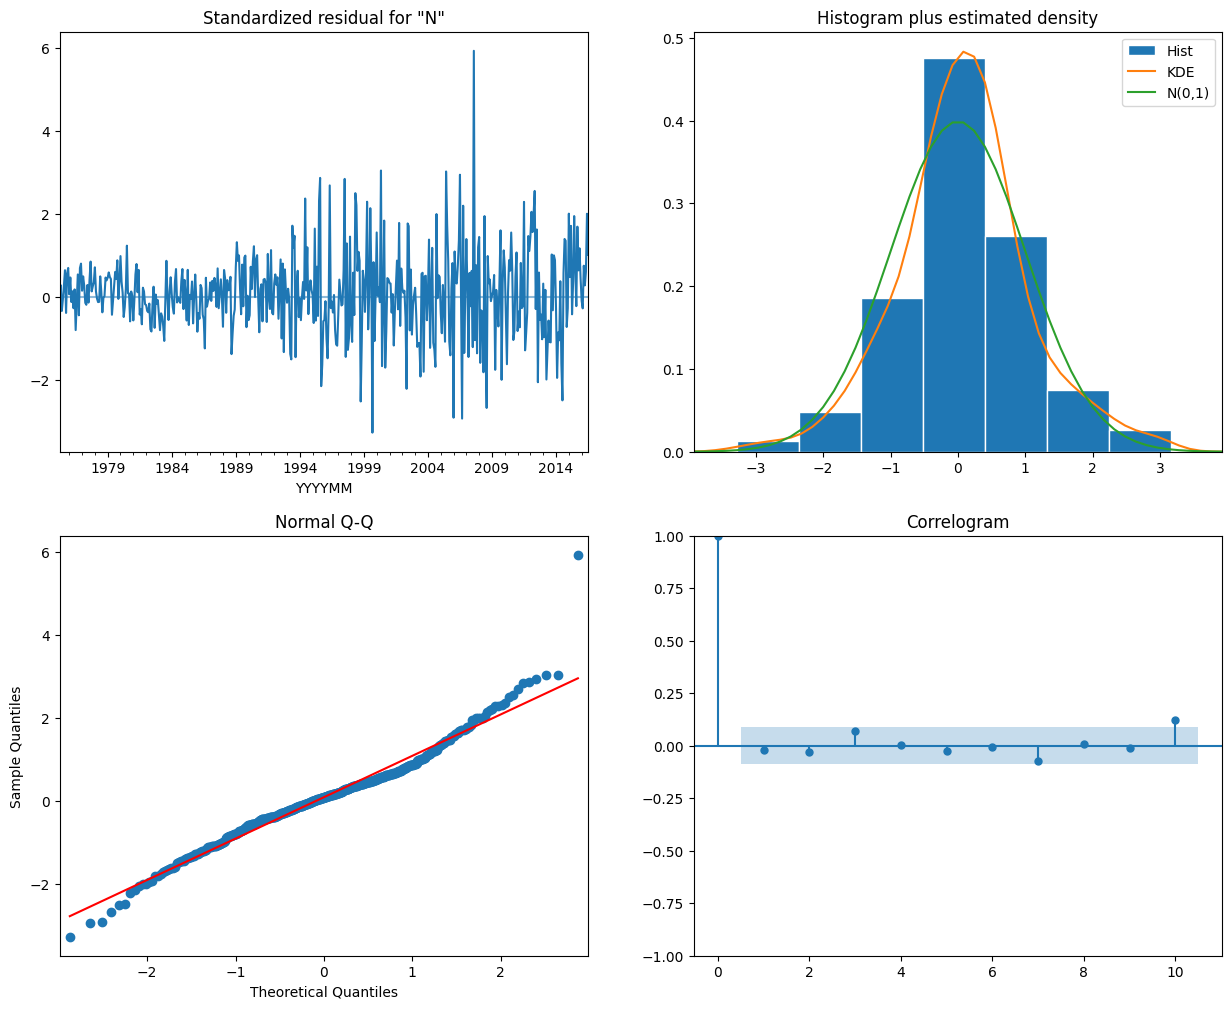

In [58]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [59]:
import pickle

# Save the model
with open('sarima_model.pkl', 'wb') as pkl_file:
    pickle.dump(results, pkl_file)

# 5) Validating prediction

In [60]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2013-01-31                                          30.203839       
2013-02-28                                          29.088383       
2013-03-31                                          28.958989       
2013-04-30                                          30.708076       
2013-05-31                                          32.104082       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2013-01-31                                          37.257328      
2013-02-28                                          36.141873      
2013-03-31                                          36.012478      
2013-04-30                                          37.761565      
2013-05-31                                          39.157572

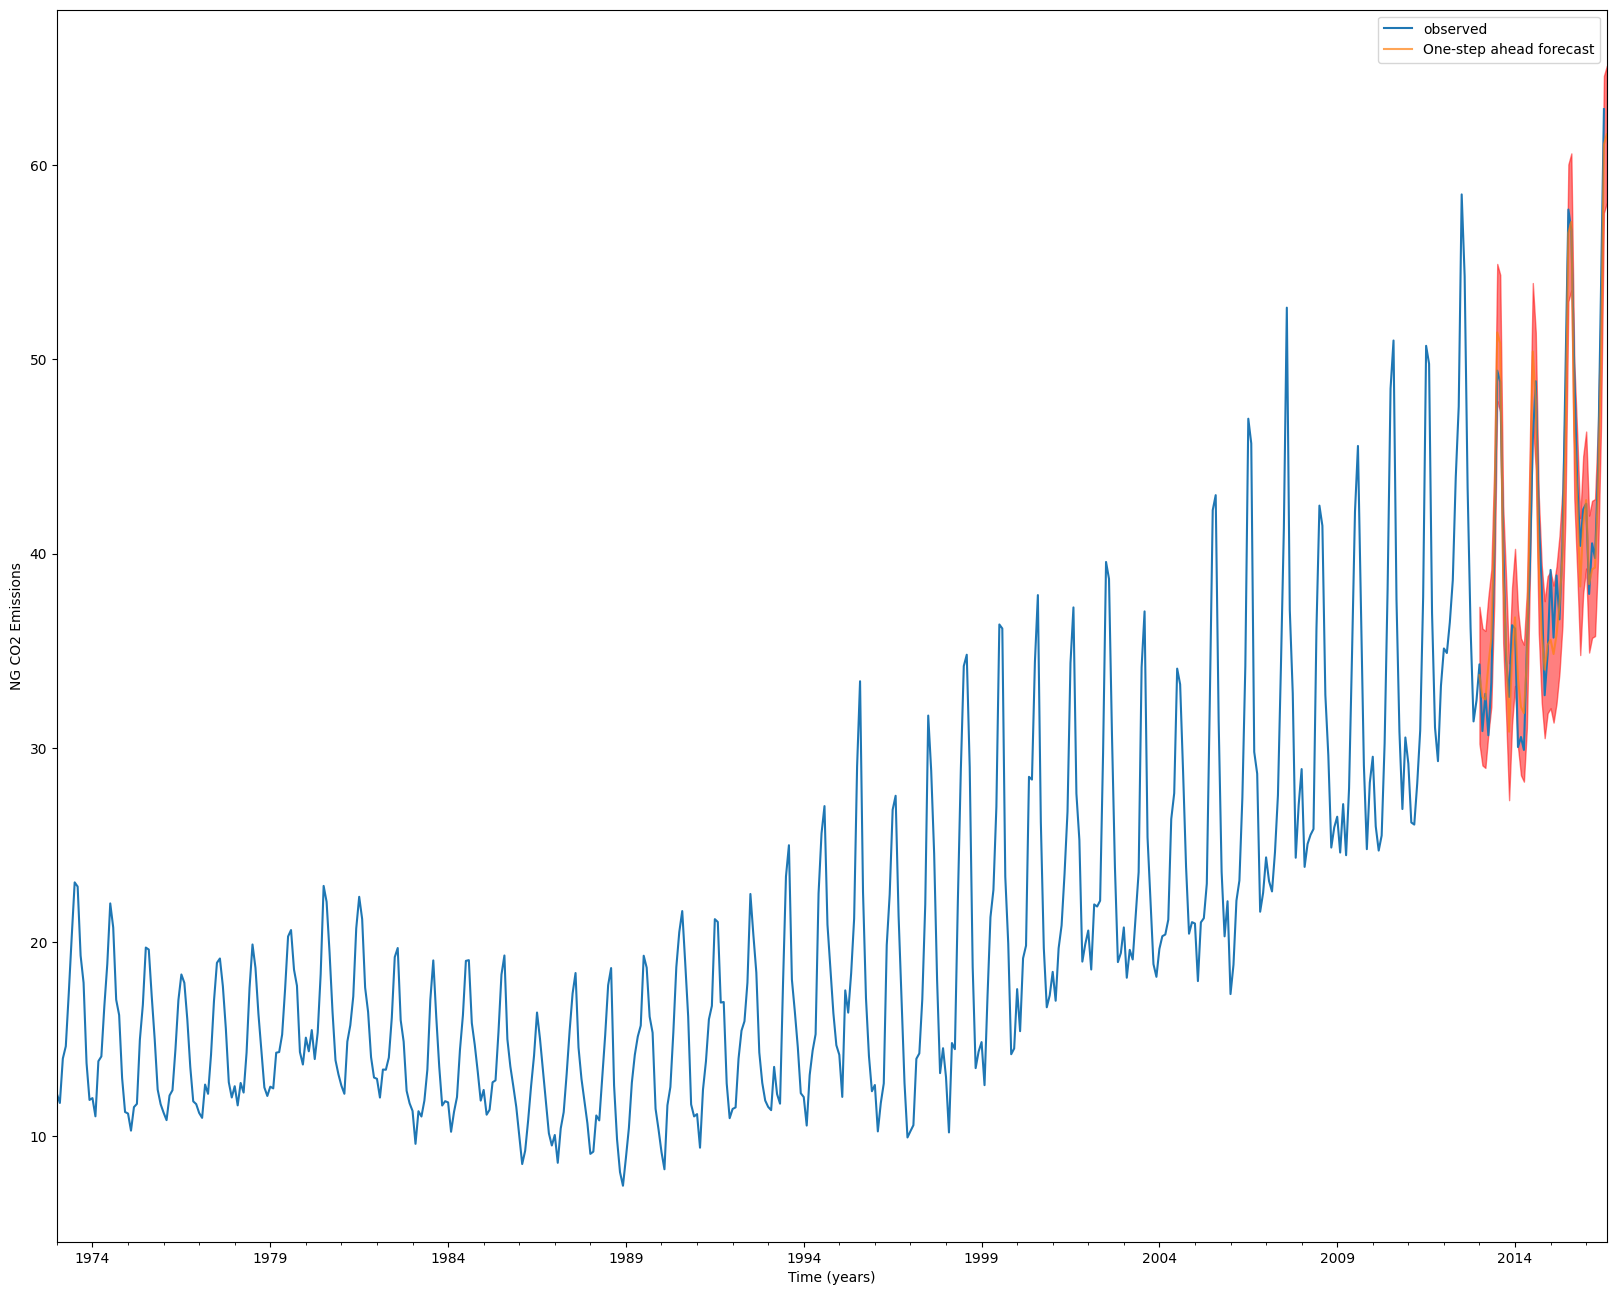

In [61]:
ax = mte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [62]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [63]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [64]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [65]:
pred_dynamic_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
YYYYMM                                                              
2013-01-31                                          30.203839       
2013-02-28                                          27.876860       
2013-03-31                                          28.733749       
2013-04-30                                          29.807001       
2013-05-31                                          33.531351       

            upper Natural Gas Electric Power Sector CO2 Emissions  
YYYYMM                                                             
2013-01-31                                          37.257328      
2013-02-28                                          36.547739      
2013-03-31                                          38.160769      
2013-04-30                                          39.641361      
2013-05-31                                          43.608935

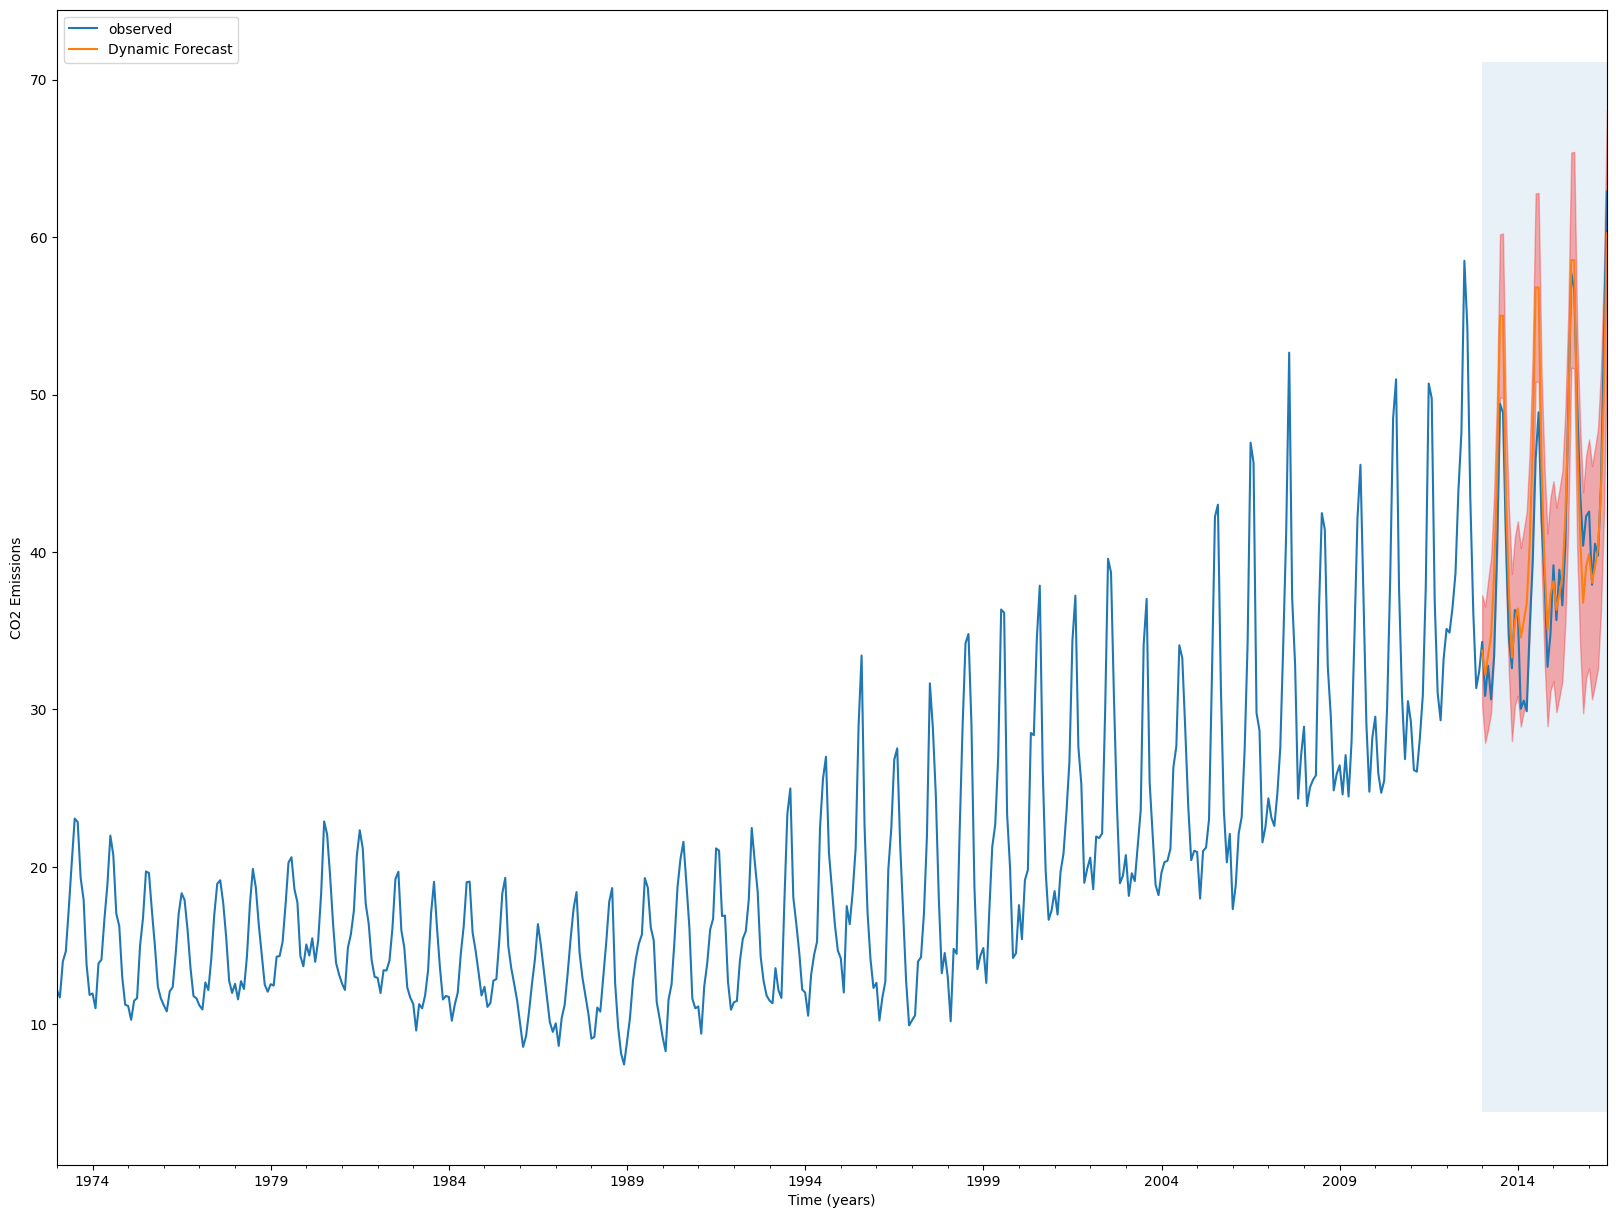

In [66]:
ax = mte['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [67]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


# 6) Forecasting

In [68]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower Natural Gas Electric Power Sector CO2 Emissions  \
2016-08-31                                          58.062560       
2016-09-30                                          47.316617       
2016-10-31                                          40.736076       
2016-11-30                                          36.175929       
2016-12-31                                          38.095118       

            upper Natural Gas Electric Power Sector CO2 Emissions  
2016-08-31                                          65.116050      
2016-09-30                                          55.987496      
2016-10-31                                          50.163096      
2016-11-30                                          46.010290      
2016-12-31                                          48.172702

In [69]:
forecast_ci.index

DatetimeIndex(['2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31',
               ...
               '2025-10-31', '2025-11-30', '2025-12-31', '2026-01-31',
               '2026-02-28', '2026-03-31', '2026-04-30', '2026-05-31',
               '2026-06-30', '2026-07-31'],
              dtype='datetime64[ns]', length=120, freq='ME')

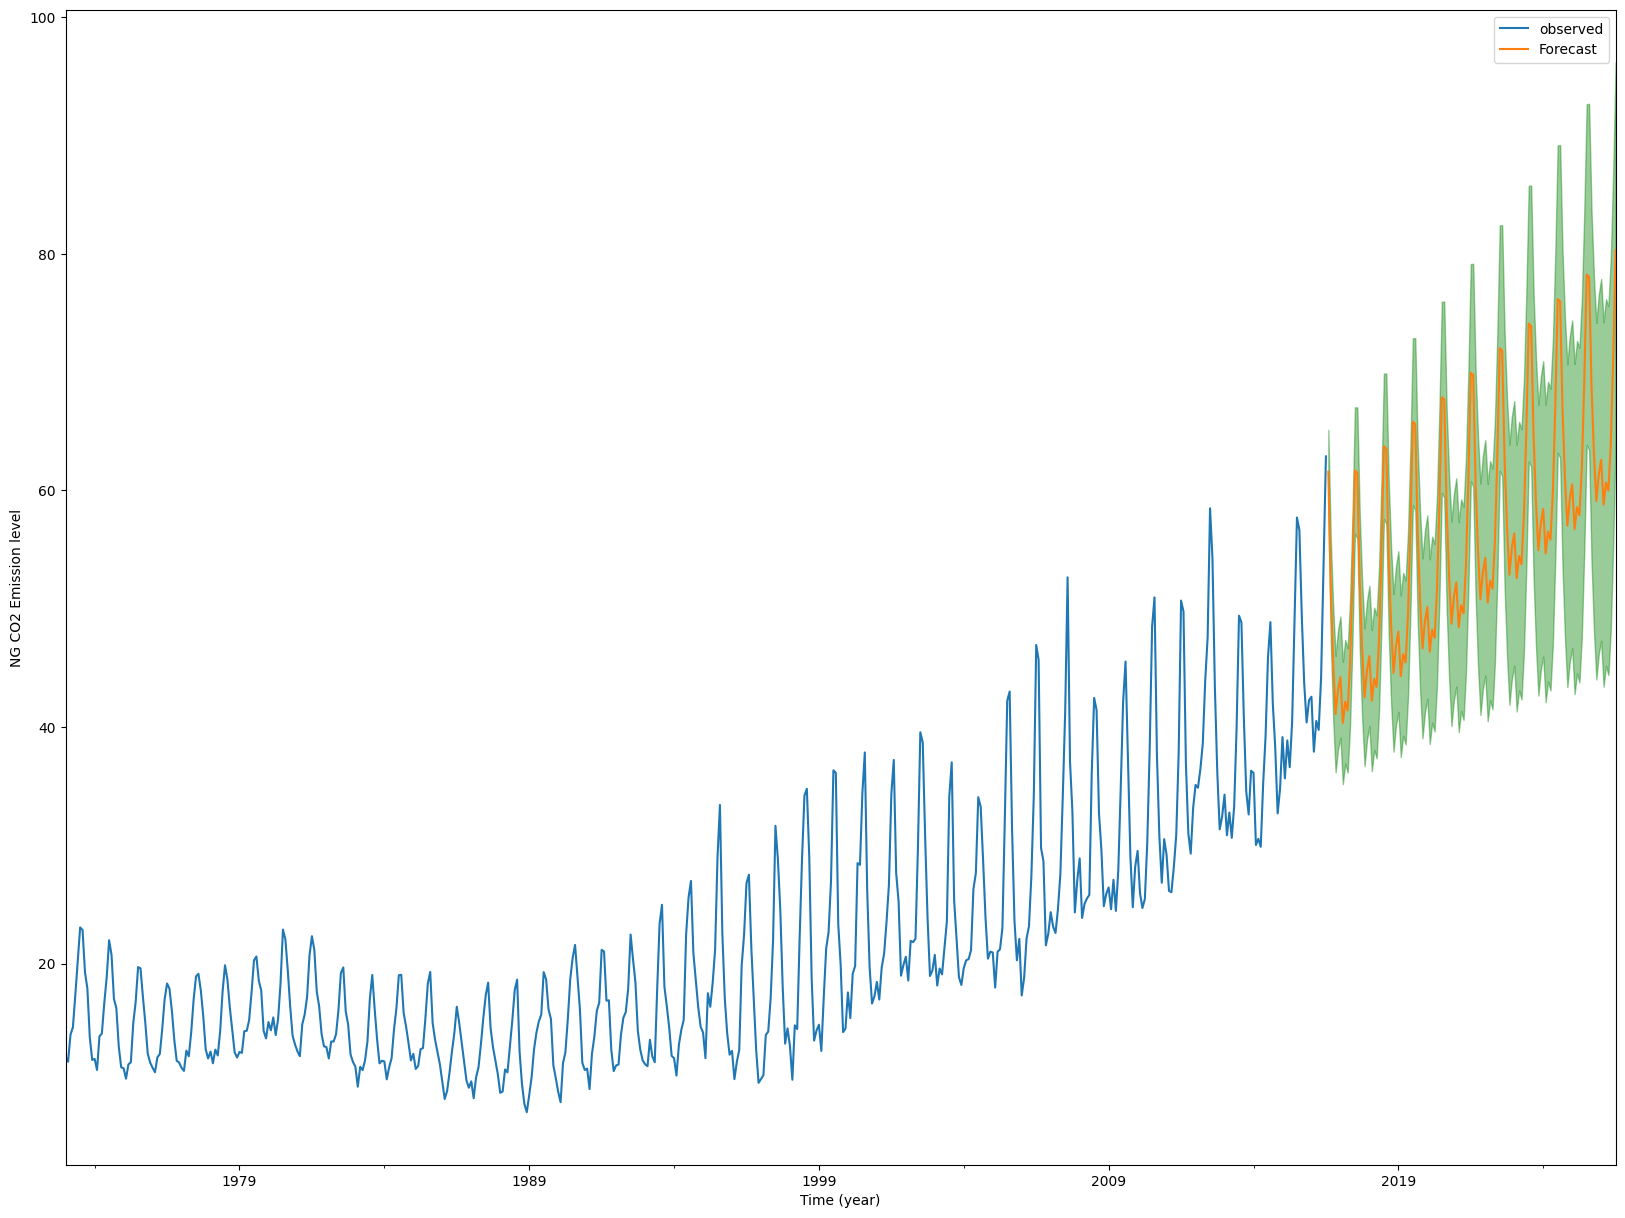

In [70]:
ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

In [80]:
forecast_ci_reset = forecast_ci.reset_index()
forecast_ci_reset.rename(columns = {'index':'Date'}, inplace = True)

In [81]:
forecast_ci_reset.head()

Date  lower Natural Gas Electric Power Sector CO2 Emissions  \
0 2016-08-31                                          58.062560       
1 2016-09-30                                          47.316617       
2 2016-10-31                                          40.736076       
3 2016-11-30                                          36.175929       
4 2016-12-31                                          38.095118       

   upper Natural Gas Electric Power Sector CO2 Emissions  
0                                          65.116050      
1                                          55.987496      
2                                          50.163096      
3                                          46.010290      
4                                          48.172702

In [82]:
forecast_ci_reset.to_csv('data/forecast_ci.csv')

In [83]:
forecast_data = pd.read_csv('data/forecast_ci.csv')

In [84]:
forecast_data.dtypes

Unnamed: 0                                                 int64
Date                                                      object
lower Natural Gas Electric Power Sector CO2 Emissions    float64
upper Natural Gas Electric Power Sector CO2 Emissions    float64
dtype: object

In [85]:
def load_forecast_data():
    forecast_data = pd.read_csv('data/forecast_ci.csv')
    if 'Date' not in forecast_data.columns:
        raise KeyError("The 'Date' column is missing from the forecast data.")
    if 'index' in forecast_data.columns:
        forecast_data.rename(columns={'index': 'Date'}, inplace=True)
    try:
        forecast_data['Date'] = pd.to_datetime(forecast_data['Date'], errors='coerce')
    except Exception as e:
        raise ValueError(f"Error converting 'Date' column to datetime: {e}")
    forecast_data.set_index('Date', inplace=True)
    forecast_data = forecast_data.loc[:, ~forecast_data.columns.str.contains('^Unnamed')]

    print(forecast_data.head())  # Debug: Print the first few rows of the forecast data
    return forecast_data

In [86]:
forecast_data = load_forecast_data()
forecast_data.head()

            lower Natural Gas Electric Power Sector CO2 Emissions  \
Date                                                                
2016-08-31                                          58.062560       
2016-09-30                                          47.316617       
2016-10-31                                          40.736076       
2016-11-30                                          36.175929       
2016-12-31                                          38.095118       

            upper Natural Gas Electric Power Sector CO2 Emissions  
Date                                                               
2016-08-31                                          65.116050      
2016-09-30                                          55.987496      
2016-10-31                                          50.163096      
2016-11-30                                          46.010290      
2016-12-31                                          48.172702      


lower Natural Gas Electric Power Sector CO2 Emissions  \
Date                                                                
2016-08-31                                          58.062560       
2016-09-30                                          47.316617       
2016-10-31                                          40.736076       
2016-11-30                                          36.175929       
2016-12-31                                          38.095118       

            upper Natural Gas Electric Power Sector CO2 Emissions  
Date                                                               
2016-08-31                                          65.116050      
2016-09-30                                          55.987496      
2016-10-31                                          50.163096      
2016-11-30                                          46.010290      
2016-12-31                                          48.172702